# `EDA Project` - `AMCAT Data Analysis`
<br>
<br>

* `AMCAT` stands for `Aspiring Minds from the Aspiring Mind Employment Outcome`
<br>
<br>

###  * `Problem Statement` : 

* Perform `Exploratory Data Analysis` (`EDA`) on the data-set `'data.xlsx'`, while considering `Salary` as a target variable. And, write a minimum of  `5 Page report` in a Ppt file or Word document.

### * `Data Description` : -

* The given dataset i.e., `'data.xlsx'` was released by `Aspiring Minds from the Aspiring Mind Employment Outcome` 2015 (`AMEO`).
<br>
<br>
* It contains the `employment outcomes` of `engineering graduates` as dependent variables (`Salary, Job Titles, and Job Locations`) along with the `standardized scores` from three different areas – `cognitive skills, technical skills and personality skills`.
<br>
<br>
* It also contains `demographic features` and a `unique identifier` for each candidate.
<br>
<br>
* It contains nearly 40 independent variables and 4000 data points.
<br>
<br>
* The independent variables are both `continuous` and `categorical` in nature.

### * `Objective of the Project` : -

* This analysis aims to gain insights and understanding from the provided dataset, particularly focusing on the relationship between various features and the target variable, which is Salary.
<br>
* Specifically, the goals of this analysis include:
<br>
• Describing the dataset and its features comprehensively.
<br>
• Identifying any patterns or trends present in the data.
<br>
• Exploring the relationships between independent and target variables (Salary).
<br>
• Identifying any outliers or anomalies in the data.

In [1]:
### Load the required libraries
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date
from PIL import Image
from wordcloud import WordCloud

from scipy import stats
import scipy.stats
from scipy.stats import chi2_contingency, chi2
from scipy.stats import ttest_1samp

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_excel(r"AMEO data/data.xlsx")

In [3]:
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [4]:
df.drop(df.columns[[0, 1, 14, 19]],axis=1, inplace=True)

In [5]:
df.head()

Salary        DOJ                  DOL               Designation  \
0   420000 2012-06-01              present   senior quality engineer   
1   500000 2013-09-01              present         assistant manager   
2   325000 2014-06-01              present          systems engineer   
3  1100000 2011-07-01              present  senior software engineer   
4   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   12graduation  ...  ComputerScience MechanicalEngg  ElectricalEngg  \
0          2007  ...               -1             -1              -1   
1          2007  ...               -1             -1              -1   
2          2010  ...               -1             -1              -1   
3          2007  ...               -1             -1              -1   
4          2008  ...               -1             -1              -1   

  TelecomEngg CivilEngg  conscientiousness  agreeableness extraversion  \
0          -1        -1             0.9737         0.8128       0.5269   
1          -1        -1            -0.7335         0.3789       1.2396   
2          -1        -1             0.2718         1.7109       0.1637   
3          -1        -1             0.0464         0.3448      -0.3440   
4          -1        -1            -0.8810        -0.2793      -1.0697   

   nueroticism  openess_to_experience  
0      1.35490                -0.4455  
1     -0.10760                 0.8637  
2     -0.86820                 0.6721  
3     -0.40780                -0.9194  
4      0.09163                -0.1295  

[5 rows x 35 columns]

In [6]:
df.shape

(3998, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   int64         
 13  Deg

In [8]:
df.describe()

Salary  10percentage  12graduation  12percentage  CollegeTier  \
count  3.998000e+03   3998.000000   3998.000000   3998.000000  3998.000000   
mean   3.076998e+05     77.925443   2008.087544     74.466366     1.925713   
std    2.127375e+05      9.850162      1.653599     10.999933     0.262270   
min    3.500000e+04     43.000000   1995.000000     40.000000     1.000000   
25%    1.800000e+05     71.680000   2007.000000     66.000000     2.000000   
50%    3.000000e+05     79.150000   2008.000000     74.400000     2.000000   
75%    3.700000e+05     85.670000   2009.000000     82.600000     2.000000   
max    4.000000e+06     97.760000   2013.000000     98.700000     2.000000   

        collegeGPA  CollegeCityTier  GraduationYear      English      Logical  \
count  3998.000000      3998.000000     3998.000000  3998.000000  3998.000000   
mean     71.486171         0.300400     2012.105803   501.649075   501.598799   
std       8.167338         0.458489       31.857271   104.940021    86.783297   
min       6.450000         0.000000        0.000000   180.000000   195.000000   
25%      66.407500         0.000000     2012.000000   425.000000   445.000000   
50%      71.720000         0.000000     2013.000000   500.000000   505.000000   
75%      76.327500         1.000000     2014.000000   570.000000   565.000000   
max      99.930000         1.000000     2017.000000   875.000000   795.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 24 columns]

In [9]:
df['DOL'].value_counts()

present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2005-03-01 00:00:00       1
2015-10-01 00:00:00       1
2010-02-01 00:00:00       1
2011-02-01 00:00:00       1
2010-10-01 00:00:00       1
Name: DOL, Length: 67, dtype: int64

In [10]:
df['DOL'].replace(to_replace='present', value='2015-31-12 00:00:00', inplace=True)

In [11]:
df.head()

Salary        DOJ                  DOL               Designation  \
0   420000 2012-06-01  2015-31-12 00:00:00   senior quality engineer   
1   500000 2013-09-01  2015-31-12 00:00:00         assistant manager   
2   325000 2014-06-01  2015-31-12 00:00:00          systems engineer   
3  1100000 2011-07-01  2015-31-12 00:00:00  senior software engineer   
4   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   12graduation  ...  ComputerScience MechanicalEngg  ElectricalEngg  \
0          2007  ...               -1             -1              -1   
1          2007  ...               -1             -1              -1   
2          2010  ...               -1             -1              -1   
3          2007  ...               -1             -1              -1   
4          2008  ...               -1             -1              -1   

  TelecomEngg CivilEngg  conscientiousness  agreeableness extraversion  \
0          -1        -1             0.9737         0.8128       0.5269   
1          -1        -1            -0.7335         0.3789       1.2396   
2          -1        -1             0.2718         1.7109       0.1637   
3          -1        -1             0.0464         0.3448      -0.3440   
4          -1        -1            -0.8810        -0.2793      -1.0697   

   nueroticism  openess_to_experience  
0      1.35490                -0.4455  
1     -0.10760                 0.8637  
2     -0.86820                 0.6721  
3     -0.40780                -0.9194  
4      0.09163                -0.1295  

[5 rows x 35 columns]

In [12]:
date_col = ['DOJ', 'DOL', 'DOB']
for col in date_col:
    df[col] = pd.to_datetime(df[col], format = '%Y-%d-%m %H:%M:%S')

In [13]:
df = df.drop(df[~(df['DOL'] > df['DOJ'])].index)

In [14]:
df.head()

Salary        DOJ        DOL               Designation    JobCity Gender  \
0   420000 2012-06-01 2015-12-31   senior quality engineer  Bangalore      f   
1   500000 2013-09-01 2015-12-31         assistant manager     Indore      m   
2   325000 2014-06-01 2015-12-31          systems engineer    Chennai      f   
3  1100000 2011-07-01 2015-12-31  senior software engineer    Gurgaon      m   
4   200000 2014-03-01 2015-01-03                       get    Manesar      m   

         DOB  10percentage                         10board  12graduation  ...  \
0 1990-02-19          84.3  board ofsecondary education,ap          2007  ...   
1 1989-10-04          85.4                            cbse          2007  ...   
2 1992-08-03          85.0                            cbse          2010  ...   
3 1989-12-05          85.6                            cbse          2007  ...   
4 1991-02-27          78.0                            cbse          2008  ...   

   ComputerScience MechanicalEngg  ElectricalEngg TelecomEngg CivilEngg  \
0               -1             -1              -1          -1        -1   
1               -1             -1              -1          -1        -1   
2               -1             -1              -1          -1        -1   
3               -1             -1              -1          -1        -1   
4               -1             -1              -1          -1        -1   

   conscientiousness  agreeableness extraversion  nueroticism  \
0             0.9737         0.8128       0.5269      1.35490   
1            -0.7335         0.3789       1.2396     -0.10760   
2             0.2718         1.7109       0.1637     -0.86820   
3             0.0464         0.3448      -0.3440     -0.40780   
4            -0.8810        -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 35 columns]

In [15]:
df.shape

(3784, 35)

In [16]:
df['Gender'].replace({'f':'Female','m':'Male'},inplace=True)

In [17]:
(df == 0).sum()[(df == 0).sum()>0]

10board             347
12board             357
CollegeCityTier    2654
GraduationYear        1
dtype: int64

In [18]:
(df == -1).sum()[(df == -1).sum()>0]/len(df)*100

JobCity                  11.152220
Domain                    6.025370
ComputerProgramming      21.775899
ElectronicsAndSemicon    71.220930
ComputerScience          78.039112
MechanicalEngg           94.238901
ElectricalEngg           96.220930
TelecomEngg              90.512685
CivilEngg                98.942918
dtype: float64

In [19]:
df = df.drop(columns=['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])

In [20]:
df[df == -1] = np.nan

In [21]:
df['10board'] = df['10board'].replace({0:np.nan})
df['12board'] = df['12board'].replace({0:np.nan})
df['GraduationYear'] = df['GraduationYear'].replace({0:np.nan})

In [22]:
df['10board'].fillna(df['10board'].mode()[0], inplace = True)
df['12board'].fillna(df['12board'].mode()[0], inplace = True)
df['GraduationYear'].fillna(df['GraduationYear'].mode()[0], inplace = True)
df['JobCity'].fillna(df['JobCity'].mode()[0], inplace = True)
df['Domain'].fillna(df['Domain'].median(), inplace = True)
df['ComputerProgramming'].fillna(df['ComputerProgramming'].median(), inplace= True)
df['ElectronicsAndSemicon'].fillna(df['ElectronicsAndSemicon'].mode()[0], inplace=True)
df['ComputerScience'].fillna(df['ComputerScience'].mode()[0], inplace=True)

In [23]:
df.shape

(3784, 31)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3784 entries, 0 to 3997
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3784 non-null   int64         
 1   DOJ                    3784 non-null   datetime64[ns]
 2   DOL                    3784 non-null   datetime64[ns]
 3   Designation            3784 non-null   object        
 4   JobCity                3784 non-null   object        
 5   Gender                 3784 non-null   object        
 6   DOB                    3784 non-null   datetime64[ns]
 7   10percentage           3784 non-null   float64       
 8   10board                3784 non-null   object        
 9   12graduation           3784 non-null   int64         
 10  12percentage           3784 non-null   float64       
 11  12board                3784 non-null   object        
 12  CollegeTier            3784 non-null   int64         
 13  Deg

In [25]:
df['DOB'].dt.year

0       1990
1       1989
2       1992
3       1989
4       1991
        ... 
3992    1990
3993    1987
3995    1991
3996    1992
3997    1991
Name: DOB, Length: 3784, dtype: int64

In [26]:
df['Age'] = 2015 - df['DOB'].dt.year

In [27]:
df['Age']

0       25
1       26
2       23
3       26
4       24
        ..
3992    25
3993    28
3995    24
3996    23
3997    24
Name: Age, Length: 3784, dtype: int64

In [28]:
df['DOJ'].dt.year

0       2012
1       2013
2       2014
3       2011
4       2014
        ... 
3992    2014
3993    2011
3995    2013
3996    2014
3997    2013
Name: DOJ, Length: 3784, dtype: int64

In [29]:
df['DOL'].dt.year

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
3992    2015
3993    2012
3995    2015
3996    2015
3997    2015
Name: DOL, Length: 3784, dtype: int64

In [30]:
df['Tenure'] = df['DOL'].dt.year - df['DOJ'].dt.year

In [31]:
df['Tenure']

0       3
1       2
2       1
3       4
4       1
       ..
3992    1
3993    1
3995    2
3996    1
3997    2
Name: Tenure, Length: 3784, dtype: int64

In [32]:
df.head()

Salary        DOJ        DOL               Designation    JobCity  Gender  \
0   420000 2012-06-01 2015-12-31   senior quality engineer  Bangalore  Female   
1   500000 2013-09-01 2015-12-31         assistant manager     Indore    Male   
2   325000 2014-06-01 2015-12-31          systems engineer    Chennai  Female   
3  1100000 2011-07-01 2015-12-31  senior software engineer    Gurgaon    Male   
4   200000 2014-03-01 2015-01-03                       get    Manesar    Male   

         DOB  10percentage                         10board  12graduation  ...  \
0 1990-02-19          84.3  board ofsecondary education,ap          2007  ...   
1 1989-10-04          85.4                            cbse          2007  ...   
2 1992-08-03          85.0                            cbse          2010  ...   
3 1989-12-05          85.6                            cbse          2007  ...   
4 1991-02-27          78.0                            cbse          2008  ...   

   ComputerProgramming ElectronicsAndSemicon  ComputerScience  \
0                445.0                 333.0            407.0   
1                455.0                 466.0            407.0   
2                395.0                 333.0            407.0   
3                615.0                 333.0            407.0   
4                455.0                 233.0            407.0   

  conscientiousness agreeableness  extraversion  nueroticism  \
0            0.9737        0.8128        0.5269      1.35490   
1           -0.7335        0.3789        1.2396     -0.10760   
2            0.2718        1.7109        0.1637     -0.86820   
3            0.0464        0.3448       -0.3440     -0.40780   
4           -0.8810       -0.2793       -1.0697      0.09163   

  openess_to_experience  Age  Tenure  
0               -0.4455   25       3  
1                0.8637   26       2  
2                0.6721   23       1  
3               -0.9194   26       4  
4               -0.1295   24       1  

[5 rows x 33 columns]

In [33]:
diff_board = ['board ofsecondary education,ap', 'board secondary  education', 'board of secondary education', 'state',
              'state board of secondary education( ssc)', 'board of secondary education,andhara pradesh','state board',
              'board of intermediate education', 'state board of secondary education,andhra pradesh', 'board of ssc',
              'secondary school cerfificate','andhra pradesh board ssc','board of secondary education,ap','apssc',
              'bse(board of secondary education)', 'school secondary education, andhra pradesh', 'state bord','matric',
              'secondary state certificate', 'andhra pradesh state board', 'secondary school certificate', 'ssc regular',
              'state board of secondary education, ap', 'board of secondary education,andhra pradesh', 'ap state board',
              'board of secondaray education', 'secondary school education', 'ap state board for secondary education',
              'board of secondary school education', 'apsche', 'board of  secondary education', 'ssc','matriculation board ',
              'board of secondary education - andhra pradesh', 'board of ssc education andhra pradesh',
              'secondary school of education','jawahar navodaya vidyalaya']

for index,row in df.iterrows():
    for diff in diff_board:
        if diff in row['10board']:
            df.at[index, '10board'] = 'state board of secondary education, AP'
            break

In [34]:
df['10board'].value_counts()

cbse                                      1655
state board of secondary education, AP    1406
icse                                       267
up board                                    80
rbse                                        21
                                          ... 
cluny                                        1
bihar examination board, patna               1
ksseb                                        1
maharashtra sate board                       1
bse,odisha                                   1
Name: 10board, Length: 178, dtype: int64

In [35]:
diff_board = ['board of intermediate education,ap', 'state board', 'state  board of intermediate education, andhra pradesh',
              'cbse', 'board of intermediate', 'borad of intermediate', 'intermediate board of andhra pardesh', 'state',
              'board of intermediate education', 'baord of intermediate education', 'apbie', 'andhra board', 'intermediate',
              'apsb', 'staae board', ' board of intermediate', 'apbsc', 'state board of technical education and training',
              'board of intermediate education,hyderabad',  'board of secondary education','pre-university','intermidiate',
            'board of intermediate education,andhra pradesh','intermediate board of education,andhra pradesh','state broad',
              'intermediate board examination', 'board of intermediate education,andra pradesh', 'intermediate board',
            'board of secondary school of education', 'andhpradesh board of intermediate education','board of intermidiate',
              'board of intermediate education, andhra pradesh', 'board of intermediate education:ap,hyderabad','ap board',
        'board of technical education', 'higher secondary state certificate', 'andhra pradesh state board','state board ',
              'narayana junior college','board of intermidiate examination','andhra pradesh board of secondary education',
              'board of intermediate education, ap', 'intermideate','state bord','intermediate board of education',
             'board of intermeadiate education','andhra pradesh','ap intermediate board','board of intrmediate education,ap',
             'board of intermediate,ap','board of intermidiate education,ap','higher secondary education','intermedite',
              'ap board for intermediate education','board fo intermediate education, ap','boardofintermediate'
              'board of intmediate education ap',]

for index,row in df.iterrows():
    for diff in diff_board:
        if diff in row['12board']:
            df.at[index, '12board'] = 'state board of intermediate education, AP'
            break

In [36]:
df['12board'].value_counts()

state board of intermediate education, AP                       3088
icse                                                             121
up board                                                          82
isc                                                               45
up                                                                19
                                                                ... 
stjoseph of cluny matrhrsecschool,neyveli,cuddalore district       1
scte and vt ,orissa                                                1
hbsc                                                               1
jawahar higher secondary school                                    1
up-board                                                           1
Name: 12board, Length: 217, dtype: int64

In [37]:
df['JobCity'].value_counts()

Bangalore           1030
Noida                349
Hyderabad            315
Pune                 281
Chennai              261
                    ... 
Asansol                1
Ernakulam              1
DELHI                  1
Nanded                 1
Asifabadbanglore       1
Name: JobCity, Length: 326, dtype: int64

In [38]:
df['JobCity'] = df['JobCity'].str.upper()

In [39]:
df['JobCity'].value_counts()

BANGALORE           1048
NOIDA                367
HYDERABAD            336
PUNE                 308
CHENNAI              291
                    ... 
ASANSOL                1
ERNAKULAM              1
NANDED                 1
DHARMAPURI             1
ASIFABADBANGLORE       1
Name: JobCity, Length: 253, dtype: int64

In [40]:
df['JobCity'] = df['JobCity'].str.strip()

In [41]:
df['JobCity'].unique()

array(['BANGALORE', 'INDORE', 'CHENNAI', 'GURGAON', 'MANESAR',
       'HYDERABAD', 'BANGLORE', 'NOIDA', 'KOLKATA', 'PUNE', 'MOHALI',
       'JHANSI', 'DELHI', 'BHUBANESWAR', 'NAVI MUMBAI', 'MUMBAI',
       'NEW DELHI', 'MANGALORE', 'REWARI', 'GAZIABAAD', 'BHIWADI',
       'RAJKOT', 'GREATER NOIDA', 'MYSORE', 'JAIPUR', 'THANE',
       'MAHARAJGANJ', 'THIRUVANANTHAPURAM', 'PUNCHKULA', 'BHUBANESHWAR',
       'COIMBATORE', 'DHANBAD', 'LUCKNOW', 'TRIVANDRUM', 'GANDHI NAGAR',
       'UNA', 'DAMAN AND DIU', 'VSAKHAPTTNAM', 'NAGPUR', 'BHAGALPUR',
       'AHMEDABAD', 'KOCHI/COCHIN', 'BANKURA', 'BENGALURU', 'VIJAYAWADA',
       'KOCHI', 'BEAWAR', 'ALWAR', 'SILIGURI', 'RAIPUR', 'BHOPAL',
       'FARIDABAD', 'JODHPUR', 'UDAIPUR', 'MUZAFFARPUR', 'BULANDSHAHAR',
       'HARIDWAR', 'RAIGARH', 'VISAKHAPATNAM', 'JABALPUR', 'UNNAO',
       'BELGAUM', 'DEHRADUN', 'RUDRAPUR', 'JAMSHEDPUR', 'VIZAG', 'NOUDA',
       'DHARAMSHALA', 'BANAGALORE', 'HISSAR', 'RANCHI', 'MADURAI',
       'GURGA', 'CHANDIGARH', 'A

In [42]:
similar_words = ['BANGALORE', 'BANGLORE', 'BENGALURU', 'BANAGALORE', 'BANAGLORE']
for word in similar_words:
    df['JobCity'] = df['JobCity'].replace(word, 'BANGALORE', regex=True)
    
similar_words01 = ['HYDERABAD', 'HDERABAD' 'HYDERABAD(BHADURPALLY)', 'HDERABAD']
for word in similar_words01:
    df['JobCity'] = df['JobCity'].replace(word, 'HYDERABAD', regex=True)
    
similar_words02 = ['GANDHI NAGAR', 'GANDHINAGAR']
for word in similar_words02:
    df['JobCity'] = df['JobCity'].replace(word, 'GANDHINAGAR', regex=True)
    
similar_words03 = ['NOIDA', 'NOUDA', 'A-64,SEC-64,NOIDA']
for word in similar_words03:
    df['JobCity'] = df['JobCity'].replace(word, 'NOIDA', regex=True)
    
similar_words04 = ['NEW DELHI', 'NEW DEHLI']
for word in similar_words04:
    df['JobCity'] = df['JobCity'].replace(word, 'NEW DELHI', regex=True)
    
similar_words05 = ['KOLKATA', 'KOLKATA`']
for word in similar_words05:
    df['JobCity'] = df['JobCity'].replace(word, 'KOLKATA', regex=True)
    
similar_words06 = ['PUNE', 'PUNR']
for word in similar_words06:
    df['JobCity'] = df['JobCity'].replace(word, 'PUNE', regex=True)
    
similar_words07 = ['VSAKHAPTTNAM', 'VIZAG', 'VISAKHAPATNAM']
for word in similar_words07:
    df['JobCity'] = df['JobCity'].replace(word, 'VIZAG', regex=True)
    
similar_words08 = ['PONDICHERRY', 'PONDY', 'PONDI', 'PONDICHERRYCHERRYCHERRYCHERRY', 'PONDICHERRYCHERRY']
for word in similar_words08:
    df['JobCity'] = df['JobCity'].replace(word, 'PONDICHERRY', regex=True)
    
similar_words09 = ['KOCHI/COCHIN', 'KOCHI']
for word in similar_words09:
    df['JobCity'] = df['JobCity'].replace(word, 'KOCHI', regex=True)
    
similar_words10 = ['TRICHY', 'TRICHUR']
for word in similar_words10:
    df['JobCity'] = df['JobCity'].replace(word, 'TRICHY', regex=True)
    
similar_words11 = ['DELHI', 'DELHI/NCR', 'NCR']
for word in similar_words11:
    df['JobCity'] = df['JobCity'].replace(word, 'DELHI', regex=True)
    
similar_words12 = ['GURGOAN', 'GURGA', 'GURGOANON', 'GURAGAON']
for word in similar_words12:
    df['JobCity'] = df['JobCity'].replace(word, 'GURGOAN', regex=True)
    
similar_words13 = ['BHUBANESWAR', 'BHUBANESHWAR', 'BHUBNESHWAR']
for word in similar_words13:
    df['JobCity'] = df['JobCity'].replace(word, 'BHUBANESWAR', regex=True)
    
similar_words14 = ['TRIVANDRUM', 'THIRUVANANTHAPURAM', 'TECHNOPARK, TRIVANDRUM']
for word in similar_words14:
    df['JobCity'] = df['JobCity'].replace(word, 'TRIVANDRUM', regex=True)
    
similar_words15 = ['GHAZIABAD', 'INDIRAPURAM, GHAZIABAD', 'GAZIABAAD', 'GAJIABAAD']
for word in similar_words15:
    df['JobCity'] = df['JobCity'].replace(word, 'GAZIABAAD', regex=True)
    
similar_words16 = ['AMBALA CITY', 'AMBALA', 'AM']
for word in similar_words16:
    df['JobCity'] = df['JobCity'].replace(word, 'AMBALA', regex=True)
    
similar_words17 = ['SAHIBABAD', 'SHAHIBABAD']
for word in similar_words17:
    df['JobCity'] = df['JobCity'].replace(word, 'SAHIBABAD', regex=True)
    
similar_words18 = ['SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN', 'RAJASTHAN']
for word in similar_words18:
    df['JobCity'] = df['JobCity'].replace(word, 'RAJASTHAN', regex=True)
    
similar_words19 = ['NASIKCITY', 'NASHIK']
for word in similar_words19:
    df['JobCity'] = df['JobCity'].replace(word, 'NASHIK', regex=True)
    
similar_words20 = ['SONEPAT', 'SONIPAT']
for word in similar_words20:
    df['JobCity'] = df['JobCity'].replace(word, 'SONIPAT', regex=True)
    
similar_words21 = ['TIRUPATHI', 'TIRUPATI']
for word in similar_words21:
    df['JobCity'] = df['JobCity'].replace(word, 'TIRUPATI', regex=True)
    
similar_words22 = ['SAMBALAPLA', 'SAMBALABALPUR']
for word in similar_words22:    
    df['JobCity'] = df['JobCity'].replace(word, 'SAMBALPUR', regex=True)
    
df['JobCity'] = df['JobCity'].replace('ASIFABADBANGALORE', 'ASIFABAD, BANGALORE', regex=True)

df['JobCity'] = df['JobCity'].replace('DHARAMBALASHALA', 'DHARAMSHALA', regex=True)

df['JobCity'] = df['JobCity'].replace('ERNAKULAMBALA', 'ERNAKULAM, AMBALA', regex=True)

df['JobCity'] = df['JobCity'].replace('GANJAMBALA', 'GANJAM, AMBALA', regex=True)

df['JobCity'] = df['JobCity'].replace('INDIRAPURAMBALA, GAZIABAAD', 'INDIRAPURAM, AMBALA, GAZIABAAD', regex=True)

df['JobCity'] = df['JobCity'].replace('KUDANKULAMBALA ,TARAPUR', 'KUDANKULAM, AMBALA ,TARAPUR', regex=True)

df['JobCity'] = df['JobCity'].replace('METTUR, TAMBALAIL NADU', 'METTUR, TAMILNADU', regex=True)

df['JobCity'] = df['JobCity'].replace('PUNCHKULA', 'PANCHKULA', regex=True)

df['JobCity'] = df['JobCity'].replace('YAMBALAUNA NAGAR', 'YAMUNA NAGAR', regex=True)

df['JobCity'] = df['JobCity'].replace('DAMBALAMAMBALA', 'DAMBAL, AMBALA', regex=True)

df['Designation'] = df['Designation'].replace(['programmer analyst trainee', 'programmer analyst'], 'programmer analyst')

df['Designation'] = df['Designation'].replace(['software eng', 'software engg', 'software engineer', 'software engineere', 'software enginner'], 'software engineer')

In [43]:
df['JobCity'].value_counts()

BANGALORE                      1086
NOIDA                           372
HYDERABAD                       348
PUNE                            316
CHENNAI                         299
                               ... 
ONGOLE                            1
KUDANKULAM, AMBALA ,TARAPUR       1
REWARI                            1
GANJAM, AMBALA                    1
ASIFABAD, BANGALORE               1
Name: JobCity, Length: 189, dtype: int64

In [44]:
df.head()

Salary        DOJ        DOL               Designation    JobCity  Gender  \
0   420000 2012-06-01 2015-12-31   senior quality engineer  BANGALORE  Female   
1   500000 2013-09-01 2015-12-31         assistant manager     INDORE    Male   
2   325000 2014-06-01 2015-12-31          systems engineer    CHENNAI  Female   
3  1100000 2011-07-01 2015-12-31  senior software engineer    GURGOAN    Male   
4   200000 2014-03-01 2015-01-03                       get    MANESAR    Male   

         DOB  10percentage                                 10board  \
0 1990-02-19          84.3  state board of secondary education, AP   
1 1989-10-04          85.4                                    cbse   
2 1992-08-03          85.0                                    cbse   
3 1989-12-05          85.6                                    cbse   
4 1991-02-27          78.0                                    cbse   

   12graduation  ...  ComputerProgramming ElectronicsAndSemicon  \
0          2007  ...                445.0                 333.0   
1          2007  ...                455.0                 466.0   
2          2010  ...                395.0                 333.0   
3          2007  ...                615.0                 333.0   
4          2008  ...                455.0                 233.0   

   ComputerScience conscientiousness agreeableness  extraversion  nueroticism  \
0            407.0            0.9737        0.8128        0.5269      1.35490   
1            407.0           -0.7335        0.3789        1.2396     -0.10760   
2            407.0            0.2718        1.7109        0.1637     -0.86820   
3            407.0            0.0464        0.3448       -0.3440     -0.40780   
4            407.0           -0.8810       -0.2793       -1.0697      0.09163   

  openess_to_experience  Age  Tenure  
0               -0.4455   25       3  
1                0.8637   26       2  
2                0.6721   23       1  
3               -0.9194   26       4  
4               -0.1295   24       1  

[5 rows x 33 columns]

In [45]:
df.describe()

Salary  10percentage  12graduation  12percentage  CollegeTier  \
count  3.784000e+03   3784.000000   3784.000000   3784.000000  3784.000000   
mean   3.127244e+05     78.004733   2008.040698     74.585687     1.923362   
std    2.142163e+05      9.861760      1.659148     11.006308     0.266052   
min    3.500000e+04     43.000000   1995.000000     40.000000     1.000000   
25%    1.950000e+05     71.847500   2007.000000     66.200000     2.000000   
50%    3.000000e+05     79.295000   2008.000000     74.565000     2.000000   
75%    3.800000e+05     85.800000   2009.000000     82.670000     2.000000   
max    4.000000e+06     97.760000   2013.000000     98.700000     2.000000   

        collegeGPA  CollegeCityTier  GraduationYear      English      Logical  \
count  3784.000000      3784.000000     3784.000000  3784.000000  3784.000000   
mean     71.561554         0.298626     2012.563425   502.406184   502.213795   
std       8.149523         0.457716        1.317121   104.773306    86.510491   
min       6.450000         0.000000     2007.000000   180.000000   195.000000   
25%      66.557500         0.000000     2012.000000   425.000000   445.000000   
50%      71.830000         0.000000     2013.000000   500.000000   505.000000   
75%      76.442500         1.000000     2014.000000   570.000000   565.000000   
max      99.930000         1.000000     2017.000000   875.000000   795.000000   

       ...  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
count  ...          3784.000000            3784.000000      3784.000000   
mean   ...           453.174947             333.897727       407.036205   
std    ...            86.259238              43.789090        42.073498   
min    ...           105.000000             133.000000       130.000000   
25%    ...           405.000000             333.000000       407.000000   
50%    ...           455.000000             333.000000       407.000000   
75%    ...           495.000000             333.000000       407.000000   
max    ...           840.000000             612.000000       715.000000   

       conscientiousness  agreeableness  extraversion  nueroticism  \
count        3784.000000    3784.000000   3784.000000  3784.000000   
mean           -0.048606       0.143360     -0.005487    -0.172855   
std             1.030495       0.946199      0.951630     1.005082   
min            -4.126700      -5.781600     -4.600900    -2.643000   
25%            -0.726400      -0.287100     -0.604800    -0.868200   
50%             0.046400       0.212400      0.091400    -0.234400   
75%             0.702700       0.812800      0.624800     0.526200   
max             1.995300       1.904800      2.535400     3.352500   

       openess_to_experience          Age       Tenure  
count            3784.000000  3784.000000  3784.000000  
mean               -0.142147    24.616808     1.621036  
std                 1.012897     1.772135     1.133743  
min                -7.375700    18.000000     0.000000  
25%                -0.669200    23.000000     1.000000  
50%                -0.094300    24.000000     1.000000  
75%                 0.502400    26.000000     2.000000  
max                 1.822400    38.000000    24.000000  

[8 rows x 22 columns]

In [46]:
len(df[(df['GraduationYear'] > df['DOJ'].dt.year)].index)

72

In [47]:
df = df.drop(df[(df['GraduationYear'] > df['DOJ'].dt.year)].index)

In [48]:
df.shape

(3712, 33)

In [49]:
df.nunique()

Salary                    173
DOJ                        72
DOL                        64
Designation               396
JobCity                   184
Gender                      2
DOB                      1810
10percentage              812
10board                   176
12graduation               15
12percentage              781
12board                   213
CollegeTier                 2
Degree                      4
Specialization             41
collegeGPA               1225
CollegeCityTier             2
CollegeState               26
GraduationYear              8
English                   110
Logical                   106
Quant                     135
Domain                    233
ComputerProgramming        75
ElectronicsAndSemicon      28
ComputerScience            19
conscientiousness         141
agreeableness             148
extraversion              151
nueroticism               213
openess_to_experience     140
Age                        16
Tenure                      6
dtype: int

In [50]:
for cols in df.columns:
    print('Value counts of', cols, end=" ")
    df[cols].value_counts()
    print('')

Value counts of Salary 

300000     272
180000     214
200000     182
325000     173
240000     145
          ... 
144000       1
1320000      1
755000       1
880000       1
925000       1
Name: Salary, Length: 173, dtype: int64


Value counts of DOJ 

2014-07-01    187
2014-08-01    171
2014-06-01    163
2014-01-01    142
2014-09-01    141
             ... 
2015-07-01      2
2010-03-01      2
2015-11-01      1
2015-12-01      1
2007-06-01      1
Name: DOJ, Length: 72, dtype: int64


Value counts of DOL 

2015-12-31    1852
2015-01-04     539
2015-01-03     119
2015-01-05     104
2015-01-01      93
              ... 
2015-01-10       1
2010-01-02       1
2011-01-02       1
2009-01-06       1
2010-01-10       1
Name: DOL, Length: 64, dtype: int64


Value counts of Designation 

software engineer                    522
software developer                   247
system engineer                      190
programmer analyst                   139
systems engineer                     112
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 396, dtype: int64


Value counts of JobCity 

BANGALORE                      1062
NOIDA                           365
HYDERABAD                       343
PUNE                            313
CHENNAI                         299
                               ... 
JHANSI                            1
ONGOLE                            1
KUDANKULAM, AMBALA ,TARAPUR       1
REWARI                            1
ASIFABAD, BANGALORE               1
Name: JobCity, Length: 184, dtype: int64


Value counts of Gender 

Male      2813
Female     899
Name: Gender, dtype: int64


Value counts of DOB 

1991-01-01    11
1991-06-03     8
1991-12-13     8
1991-07-15     8
1991-05-04     8
              ..
1988-04-20     1
1991-12-28     1
1994-01-15     1
1988-08-09     1
1987-04-15     1
Name: DOB, Length: 1810, dtype: int64


Value counts of 10percentage 

78.00    72
82.00    64
85.00    61
86.00    61
73.00    60
         ..
78.10     1
64.57     1
86.88     1
61.69     1
78.72     1
Name: 10percentage, Length: 812, dtype: int64


Value counts of 10board 

cbse                                      1620
state board of secondary education, AP    1381
icse                                       262
up board                                    78
rbse                                        21
                                          ... 
cluny                                        1
bihar examination board, patna               1
ksseb                                        1
maharashtra sate board                       1
bse,odisha                                   1
Name: 10board, Length: 176, dtype: int64


Value counts of 12graduation 

2009    961
2008    881
2010    658
2007    509
2006    398
2005    153
2004     70
2011     32
2003     23
2002     12
2012     10
2001      2
1998      1
2013      1
1999      1
Name: 12graduation, dtype: int64


Value counts of 12percentage 

70.00    67
72.00    59
74.00    58
62.00    55
76.00    54
         ..
95.41     1
67.75     1
83.58     1
60.01     1
82.55     1
Name: 12percentage, Length: 781, dtype: int64


Value counts of 12board 

state board of intermediate education, AP                       3028
icse                                                             120
up board                                                          80
isc                                                               44
up                                                                19
                                                                ... 
matric board                                                       1
stjoseph of cluny matrhrsecschool,neyveli,cuddalore district       1
scte and vt ,orissa                                                1
hbsc                                                               1
up-board                                                           1
Name: 12board, Length: 213, dtype: int64


Value counts of CollegeTier 

2    3429
1     283
Name: CollegeTier, dtype: int64


Value counts of Degree 

B.Tech/B.E.      3456
MCA               221
M.Tech./M.E.       34
M.Sc. (Tech.)       1
Name: Degree, dtype: int64


Value counts of Specialization 

electronics and communication engineering      823
computer science & engineering                 666
information technology                         634
computer engineering                           580
computer application                           221
mechanical engineering                         180
electronics and electrical engineering         175
electronics & telecommunications               116
electrical engineering                          76
electronics & instrumentation eng               31
civil engineering                               28
information science engineering                 25
electronics and instrumentation engineering     25
instrumentation and control engineering         19
electronics engineering                         17
biotechnology                                   14
other                                           10
industrial & production engineering              9
chemical engineering                             8
applied electronics and instrum


Value counts of collegeGPA 

70.00    101
72.00     88
75.00     78
65.00     76
68.00     69
        ... 
73.15      1
90.01      1
71.36      1
77.37      1
70.42      1
Name: collegeGPA, Length: 1225, dtype: int64


Value counts of CollegeCityTier 

0    2604
1    1108
Name: CollegeCityTier, dtype: int64


Value counts of CollegeState 

Uttar Pradesh        846
Karnataka            348
Tamil Nadu           346
Telangana            290
Maharashtra          245
Andhra Pradesh       213
Madhya Pradesh       179
West Bengal          177
Punjab               170
Haryana              168
Orissa               167
Rajasthan            156
Delhi                153
Uttarakhand          105
Kerala                33
Chhattisgarh          26
Jharkhand             25
Gujarat               21
Himachal Pradesh      14
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Goa                    1
Sikkim                 1
Meghalaya              1
Name: CollegeState, dtype: int64


Value counts of GraduationYear 

2013.0    1099
2014.0     930
2012.0     820
2011.0     497
2010.0     290
2015.0      52
2009.0      23
2007.0       1
Name: GraduationYear, dtype: int64


Value counts of English 

475    149
465    140
545    137
535    131
405    105
      ... 
790      1
870      1
825      1
875      1
334      1
Name: English, Length: 110, dtype: int64


Value counts of Logical 

485    146
495    143
545    141
555    139
505    109
      ... 
310      1
534      1
274      1
674      1
660      1
Name: Logical, Length: 106, dtype: int64


Value counts of Quant 

605    135
485    120
545    115
575    110
515     95
      ... 
245      1
145      1
755      1
805      1
394      1
Name: Quant, Length: 135, dtype: int64


Value counts of Domain 

0.649390    275
0.538387    108
0.622643    102
0.486747     97
0.376060     97
           ... 
0.002750      1
0.519864      1
0.885704      1
0.521736      1
0.938588      1
Name: Domain, Length: 233, dtype: int64


Value counts of ComputerProgramming 

455.0    929
435.0    136
475.0    133
445.0    131
465.0    124
        ... 
745.0      1
840.0      1
394.0      1
804.0      1
494.0      1
Name: ComputerProgramming, Length: 75, dtype: int64


Value counts of ElectronicsAndSemicon 

333.0    2762
300.0     105
366.0     101
266.0      86
400.0      78
292.0      67
356.0      59
324.0      57
233.0      50
433.0      45
388.0      44
200.0      42
260.0      31
466.0      28
452.0      28
500.0      22
420.0      21
228.0      20
196.0      14
166.0      12
484.0      10
516.0       6
533.0       6
548.0       5
566.0       4
133.0       4
164.0       3
612.0       2
Name: ElectronicsAndSemicon, dtype: int64


Value counts of ComputerScience 

407.0    3014
376.0     113
438.0     103
346.0     103
469.0      71
315.0      67
500.0      59
284.0      44
530.0      42
253.0      27
561.0      22
592.0      14
223.0      11
623.0       9
653.0       8
715.0       2
684.0       1
130.0       1
192.0       1
Name: ComputerScience, dtype: int64


Value counts of conscientiousness 

 0.2718    131
-0.1590    123
 0.4155    118
-0.0154    116
 0.5591    115
          ... 
-0.0415      1
-2.6007      1
 0.7208      1
 0.3350      1
 0.8986      1
Name: conscientiousness, Length: 141, dtype: int64


Value counts of agreeableness 

 0.3789    173
 0.2124    164
 0.5454    159
 0.0459    148
 0.7119    145
          ... 
-3.0094      1
-3.9501      1
-0.1054      1
-1.7223      1
-0.8320      1
Name: agreeableness, Length: 148, dtype: int64


Value counts of extraversion 

 0.3174    163
 0.4711    161
 0.1637    137
 0.7785    133
 0.6248    125
          ... 
-3.5250      1
-3.8636      1
 1.5791      1
-0.1408      1
-1.2056      1
Name: extraversion, Length: 151, dtype: int64


Value counts of nueroticism 

-0.4879    116
-0.7415    104
-0.6147    101
 0.0192    100
-0.2344     96
          ... 
 3.0617      1
-0.7350      1
-0.7496      1
 2.7650      1
 2.0306      1
Name: nueroticism, Length: 213, dtype: int64


Value counts of openess_to_experience 

 0.6721    170
 0.0973    164
-0.0943    162
 0.4805    159
 0.2889    158
          ... 
 0.1187      1
-5.6860      1
-1.1291      1
-0.0167      1
-0.4229      1
Name: openess_to_experience, Length: 140, dtype: int64


Value counts of Age 

24    897
23    770
25    739
26    505
27    295
22    263
28    111
29     57
30     27
21     27
31     13
32      3
33      2
18      1
34      1
20      1
Name: Age, dtype: int64


Value counts of Tenure 

1    1907
2     868
3     415
0     265
4     198
5      59
Name: Tenure, dtype: int64

## <<< `Univariate Analysis` >>>

<AxesSubplot:xlabel='Salary'>

Text(0.5, 1.0, 'Boxen plot for Salary with Outliers')

<AxesSubplot:xlabel='Salary'>

Text(0.5, 1.0, 'Boxen plot for Salary without Outliers')

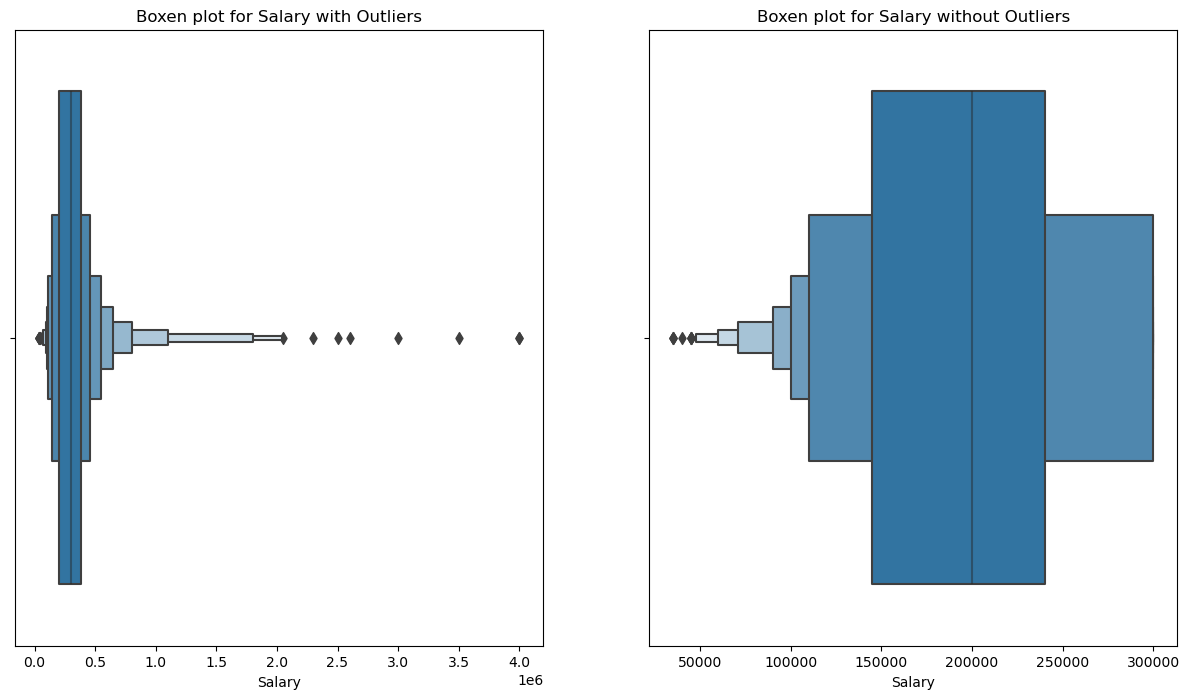

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.boxenplot(x=df["Salary"], ax=ax[0])
ax[0].set_title('Boxen plot for Salary with Outliers')
clean_df = df[df.Salary <= 300000]
sns.boxenplot(x=clean_df["Salary"], ax=ax[1])
ax[1].set_title('Boxen plot for Salary without Outliers')

##### `Observation` : In the Boxen plot of candidates salaries, we observed that more of boxen was at right side which has lower salaries . It indicates that a majority of candidates earn salaries on the lower end. We plot 2 plots for with outliers and without outliers .

<Figure size 1400x600 with 0 Axes>

<AxesSubplot:xlabel='DOJ', ylabel='count'>

Text(0.5, 1.0, 'Count plot of Date of joining the company')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 [Text(0, 0, '2012-06-01T00:00:00.000000000'),
  Text(1, 0, '2013-09-01T00:00:00.000000000'),
  Text(2, 0, '2014-06-01T00:00:00.000000000'),
  Text(3, 0, '2011-07-01T00:00:00.000000000'),
  Text(4, 0, '2014-03-01T00:00:00.000000000'),
  Text(5, 0, '2014-08-01T00:00:00.000000000'),
  Text(6, 0, '2013-07-01T00:00:00.000000000'),
  Text(7, 0, '2014-07-01T00:00:00.000000000'),
  Text(8, 0, '2011-04-01T00:00:00.000000000'),
  Text(9, 0, '2011-08-01T00:00:00.000000000'),
  Text(10, 0, '2013-12-01T00:00:00.000000000'),
  Text(11, 0, '2014-01-01T00:00:00.000000000'),
  Text(12, 0, '2013-08-01T00:00:00.000000000'),
  Text(13, 0, '2014-09-01T00:00:00.000000000'),
  Text(1

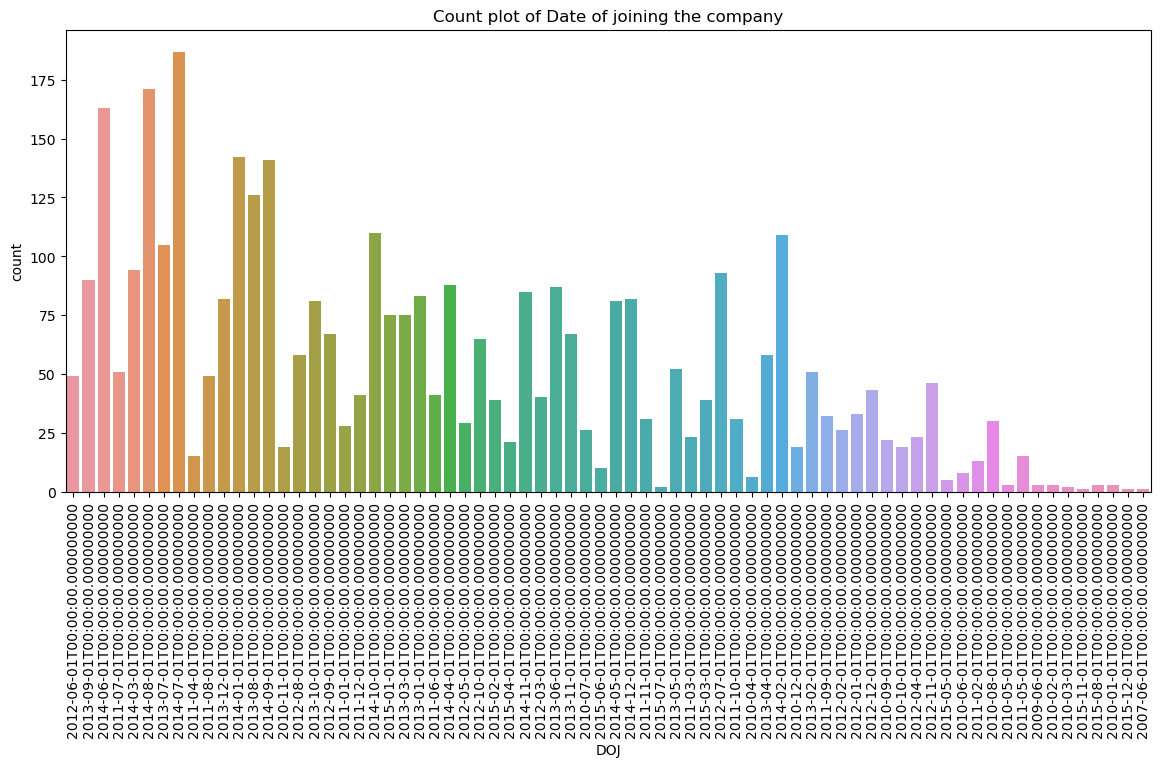

In [52]:
df['DOJ'] = pd.to_datetime(df['DOJ'])

plt.figure(figsize=(14, 6))
sns.countplot(x='DOJ', data=df)
plt.title('Count plot of Date of joining the company')
plt.xticks(rotation=90)
plt.show()

##### `Observation` : In the Count plot of candidates DOJ, we observed that a lot of candidates joined in 2014, 2013 respectively .

<Figure size 1400x600 with 0 Axes>

<AxesSubplot:xlabel='DOL', ylabel='count'>

Text(0.5, 1.0, 'Count plot of Date of leaving the company')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, '2015-12-31T00:00:00.000000000'),
  Text(1, 0, '2015-01-03T00:00:00.000000000'),
  Text(2, 0, '2015-01-05T00:00:00.000000000'),
  Text(3, 0, '2015-01-04T00:00:00.000000000'),
  Text(4, 0, '2014-01-10T00:00:00.000000000'),
  Text(5, 0, '2014-01-09T00:00:00.000000000'),
  Text(6, 0, '2014-01-06T00:00:00.000000000'),
  Text(7, 0, '2012-01-09T00:00:00.000000000'),
  Text(8, 0, '2013-01-12T00:00:00.000000000'),
  Text(9, 0, '2015-01-06T00:00:00.000000000'),
  Text(10, 0, '2013-01-10T00:00:00.000000000'),
  Text(11, 0, '2015-01-01T00:00:00.000000000'),
  Text(12, 0, '2013-01-06T00:00:00.000000000'),
  Text(13, 0, '2012-01-03T00:00:00.000000000'),
  Text(14, 0, '2014-01-07T00:00:00.000000000'),


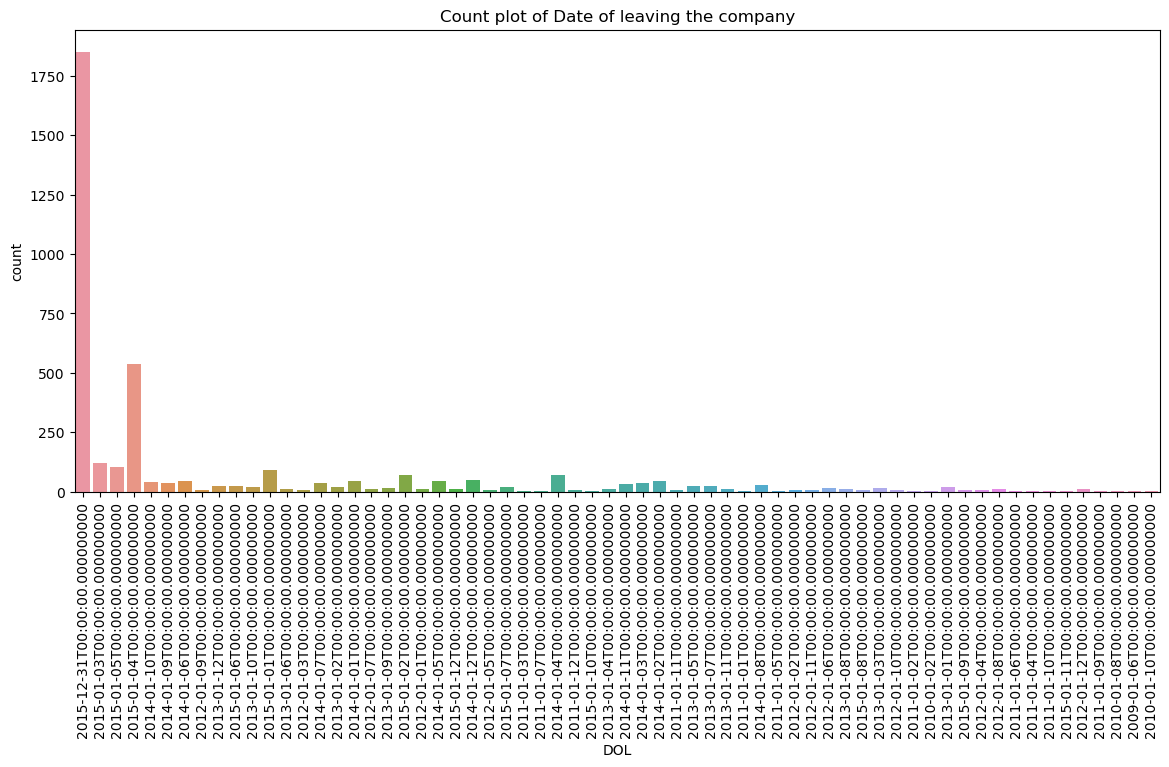

In [53]:
df['DOL'] = pd.to_datetime(df['DOL'])

plt.figure(figsize=(14, 6))
sns.countplot(x='DOL', data=df)
plt.title('Count plot of Date of leaving the company')
plt.xticks(rotation=90)

##### `Observation` : In the Count plot of candidates DOL, we observed that more of candidates left in 2015.

[Text(0, 0, '522'),
 Text(0, 0, '247'),
 Text(0, 0, '190'),
 Text(0, 0, '139'),
 Text(0, 0, '112'),
 Text(0, 0, '103'),
 Text(0, 0, '96'),
 Text(0, 0, '72'),
 Text(0, 0, '71'),
 Text(0, 0, '67')]

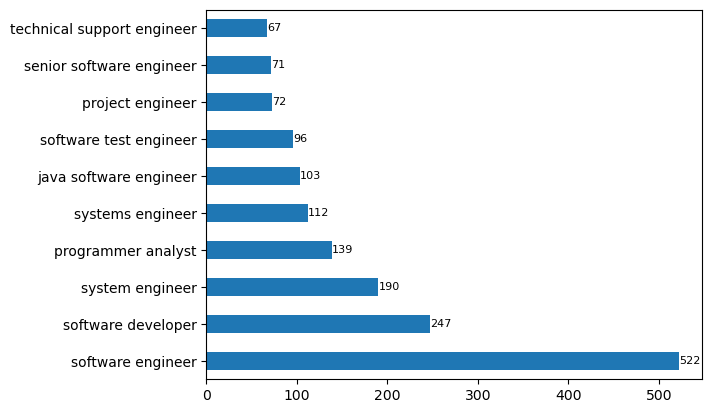

In [54]:
#### Data ploting in barplot for 'Designation' from DataFrame
ax = df['Designation'].value_counts()[:10].plot.barh()
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

##### `Observation` : In the horizontal bar plot of candidates Designations, we observed that Software Engineer , Software Developer and System Engineer earn more respectively.

[Text(0, 0, '1062'),
 Text(0, 0, '365'),
 Text(0, 0, '343'),
 Text(0, 0, '313'),
 Text(0, 0, '299'),
 Text(0, 0, '205'),
 Text(0, 0, '190'),
 Text(0, 0, '117'),
 Text(0, 0, '112'),
 Text(0, 0, '46')]

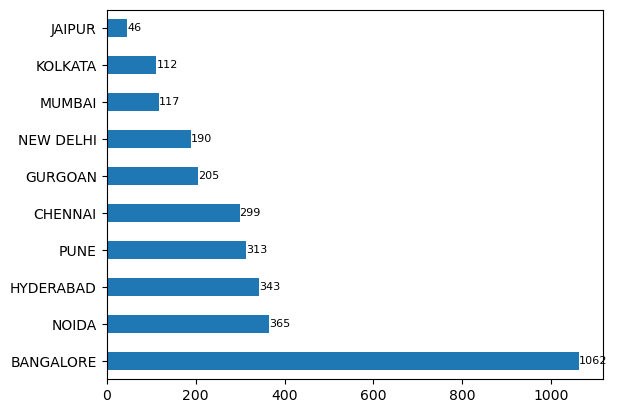

In [55]:
#### Data ploting in barplot for 'JobCity' from DataFrame
ax = df['JobCity'].value_counts()[:10].plot.barh()
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

##### `Observation` : In the horizontal bar plot of candidates Job City, we observed that Bangalore, Noida and Hyderabad are most often cities with candidates jobs respectively.

<AxesSubplot:ylabel='Gender'>

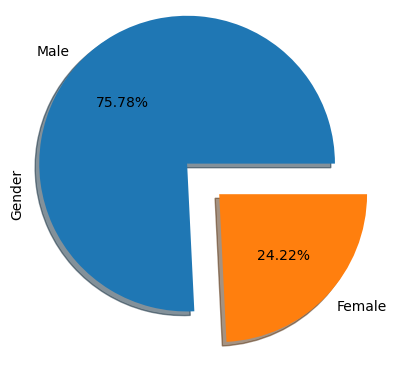

In [56]:
explode = (0.3, 0)
df['Gender'].value_counts().plot.pie(autopct='%.2f%%', explode = explode, shadow = True)

##### `Observation` : In the pie chart of Gender of candidates, we can observe that more of Male candidates are presented in AMCAT exam than Female candidates.

(array([  1.,   1.,   1.,   1.,   3.,   2.,  12.,  15.,  21.,  27.,  38.,
         61.,  97., 170., 213., 308., 311., 453., 482., 491., 418., 353.,
        173.,  41.,  13.,   4.,   1.,   0.,   0.,   1.]),
 array([ 4143. ,  4338.5,  4534. ,  4729.5,  4925. ,  5120.5,  5316. ,
         5511.5,  5707. ,  5902.5,  6098. ,  6293.5,  6489. ,  6684.5,
         6880. ,  7075.5,  7271. ,  7466.5,  7662. ,  7857.5,  8053. ,
         8248.5,  8444. ,  8639.5,  8835. ,  9030.5,  9226. ,  9421.5,
         9617. ,  9812.5, 10008. ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Histogram of Date of birth of candidate')

Text(0.5, 0, 'DOB')

Text(0, 0.5, 'Count')

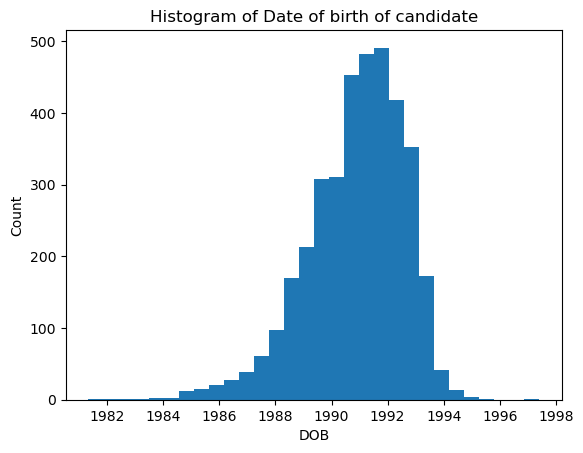

In [57]:
plt.hist(df['DOB'], bins=30)
plt.title('Histogram of Date of birth of candidate')
plt.xlabel('DOB')
plt.ylabel('Count')

##### `Observation` : In the Histogram of DOB of candidates, we can observe that more of AMCAT exam 2015 born in 1991 year.

<AxesSubplot:xlabel='10percentage'>

Text(0.5, 1.0, 'box plot for 10percentage')

<AxesSubplot:xlabel='12percentage'>

Text(0.5, 1.0, 'box plot for 12percentage')

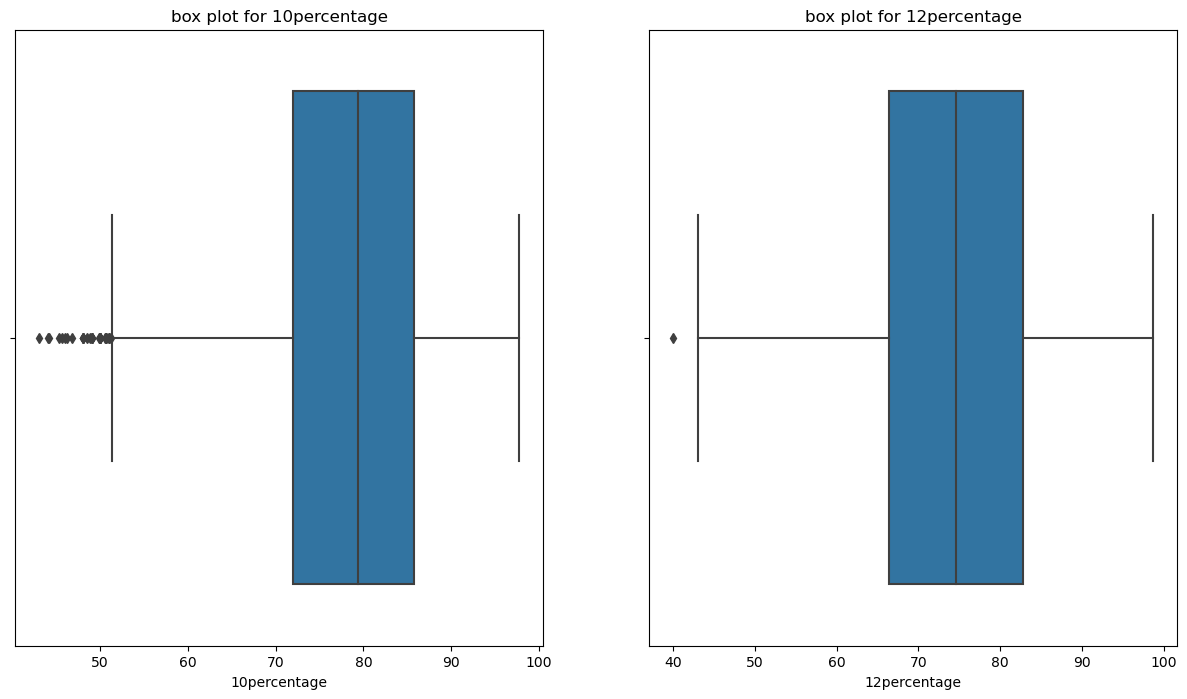

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.boxplot(df['10percentage'],ax=ax[0])
ax[0].set_title('box plot for 10percentage')
sns.boxplot(df['12percentage'],ax=ax[1])
ax[1].set_title('box plot for 12percentage')

##### `Observation` : In the Box plots of 10percentage & 12percentage, more of candidates gain 70% to 85% nearly .

In [59]:
top_10board = df['10board'].value_counts().sort_values(ascending=False).nlargest(5)
top_10board

cbse                                      1620
state board of secondary education, AP    1381
icse                                       262
up board                                    78
rbse                                        21
Name: 10board, dtype: int64

In [60]:
top_12board = df['12board'].value_counts().sort_values(ascending=False).nlargest(5)
top_12board

state board of intermediate education, AP    3028
icse                                          120
up board                                       80
isc                                            44
up                                             19
Name: 12board, dtype: int64

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Horizontal Bar plot of top_10board')

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Horizontal Bar plot of top_12board')

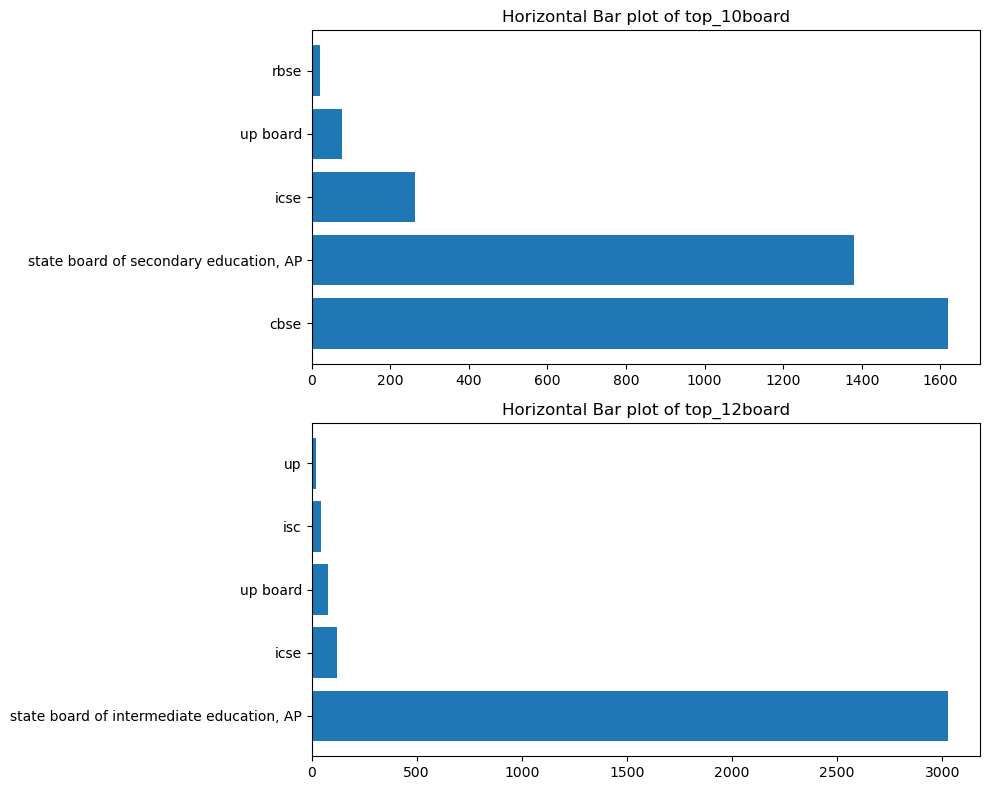

In [61]:
fig, ax = plt.subplots(2, 1, figsize = (10,8))

ax[0].barh(top_10board.index, top_10board.values)
ax[0].set_title("Horizontal Bar plot of top_10board")
ax[1].barh(top_12board.index, top_12board.values)
ax[1].set_title("Horizontal Bar plot of top_12board")

# Show the plot
plt.tight_layout()
plt.show()

##### `Observation` : In the Horizontal bar plot of top_10board & top_12board, we can observe that CBSE and state board of intermediate education, AP are the more of candidates studied their 10th and intermediate(12th) respectively.

<AxesSubplot:title={'center':'12graduation'}>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count')

<AxesSubplot:title={'center':'GraduationYear'}>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count')

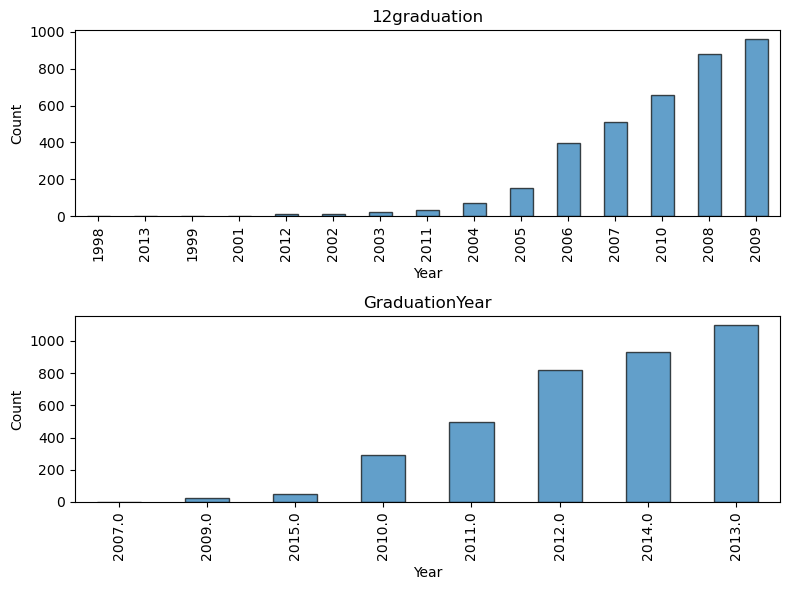

In [62]:
fig, ax = plt.subplots(2, 1, figsize = (8,6))

df['12graduation'].value_counts().sort_values(ascending=True).plot(kind='bar',title='12graduation',ec='k',alpha=0.7,ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')
df['GraduationYear'].value_counts().sort_values(ascending=True).plot(kind='bar',title='GraduationYear',ec='k',alpha=0.7,ax=ax[1])
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

##### `Observation` : In the above bar plots of 12graduation & graduation year of degree , we can observe that more candidates were graduated in 2009 and 2013 respectively .

([<matplotlib.patches.Wedge at 0x1a75ed43b80>,
 [Text(-1.0685990874673987, 0.26095208422973526, '2'),
  Text(1.0685990813593742, -0.2609521092421019, '1')],
 [Text(-0.582872229527672, 0.1423375004889465, '92.4%'),
  Text(0.5828722261960222, -0.14233751413205556, '7.6%')])

Text(0.5, 1.0, 'pie plot for CollegeTier')

([<matplotlib.patches.Wedge at 0x1a75ed64100>,
 [Text(-0.6507743017026658, 0.8868442976325707, '0'),
  Text(0.6507743847350189, -0.8868442367026793, '1')],
 [Text(-0.35496780092872676, 0.4837332532541294, '70.2%'),
  Text(0.35496784621910116, -0.4837332200196432, '29.8%')])

Text(0.5, 1.0, 'pie plot for CollegeCityTier')

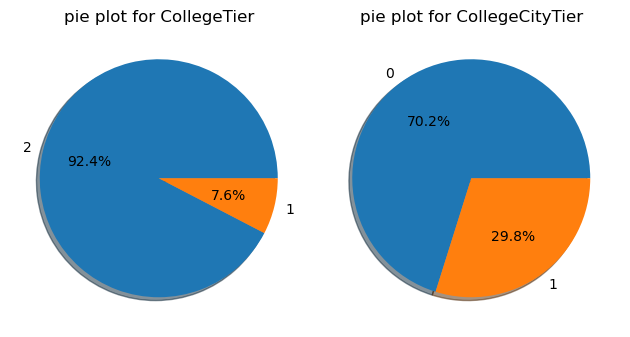

In [63]:
fig, ax = plt.subplots(1, 2)

ax[0].pie(df['CollegeTier'].value_counts().tolist(), labels = df['CollegeTier'].value_counts().index,autopct = '%1.1f%%',shadow = True)
ax[0].set_title('pie plot for CollegeTier')
ax[1].pie(df['CollegeCityTier'].value_counts().tolist(), labels = df['CollegeCityTier'].value_counts().index,autopct = '%1.1f%%',shadow = True)
ax[1].set_title('pie plot for CollegeCityTier')

# Show the plot
plt.tight_layout()
plt.show()

##### `Observation` : In the above pie charts of College Tier & College City Tier, Almost all the college belongs to Tier 1 only with 92.4%  and Majority of the colleges are form Tier 0 city with 70.2% .

<AxesSubplot:ylabel='Degree'>

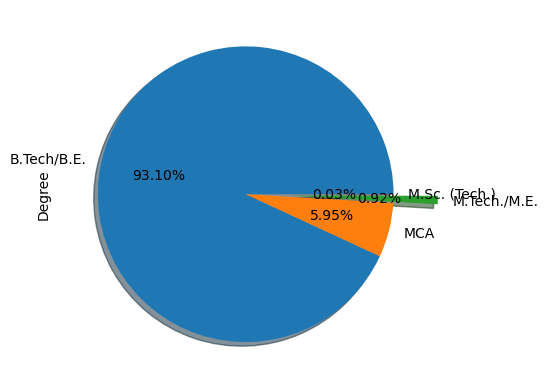

In [64]:
#### Data ploting in pieplot for 'Degree' from DataFrame

explode = (0, 0, 0.3, 0)
df['Degree'].value_counts().plot.pie(autopct='%.2f%%', explode = explode, shadow = True)

##### `Observation` : In the above horizontal bar plot of top-10 Specialization done by candidates, we can observe that ‘IT’ , ‘CSE’ and ‘ECE’ are highest in count respectively .

[Text(0, 0, '823'),
 Text(0, 0, '666'),
 Text(0, 0, '634'),
 Text(0, 0, '580'),
 Text(0, 0, '221'),
 Text(0, 0, '180'),
 Text(0, 0, '175'),
 Text(0, 0, '116'),
 Text(0, 0, '76'),
 Text(0, 0, '31')]

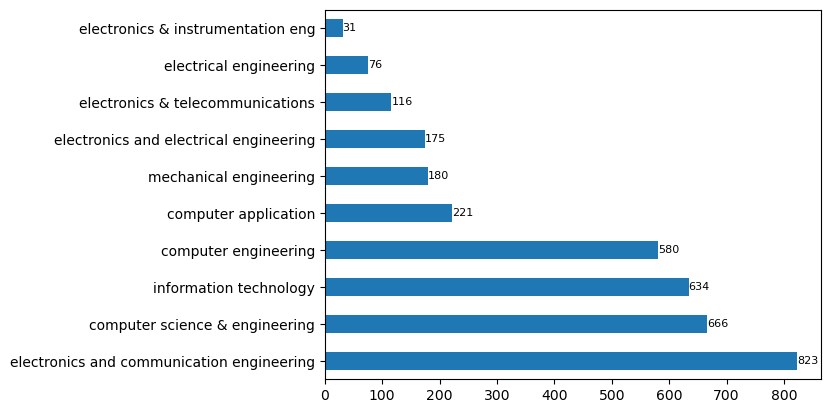

In [65]:
#### Data ploting in barplot for 'Specialization' from DataFrame
ax = df['Specialization'].value_counts()[:10].plot.barh()
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

##### `Observation` : In the above horizontal bar plot of top-10 Specialization done by candidates, we can observe that ‘IT’ , ‘CSE’ and ‘ECE’ are highest in count respectively .

<AxesSubplot:ylabel='collegeGPA'>

Text(0.5, 1.0, 'Box plot for collegeGPA with Outliers')

<AxesSubplot:ylabel='collegeGPA'>

Text(0.5, 1.0, 'Box plot for collegeGPA without Outliers')

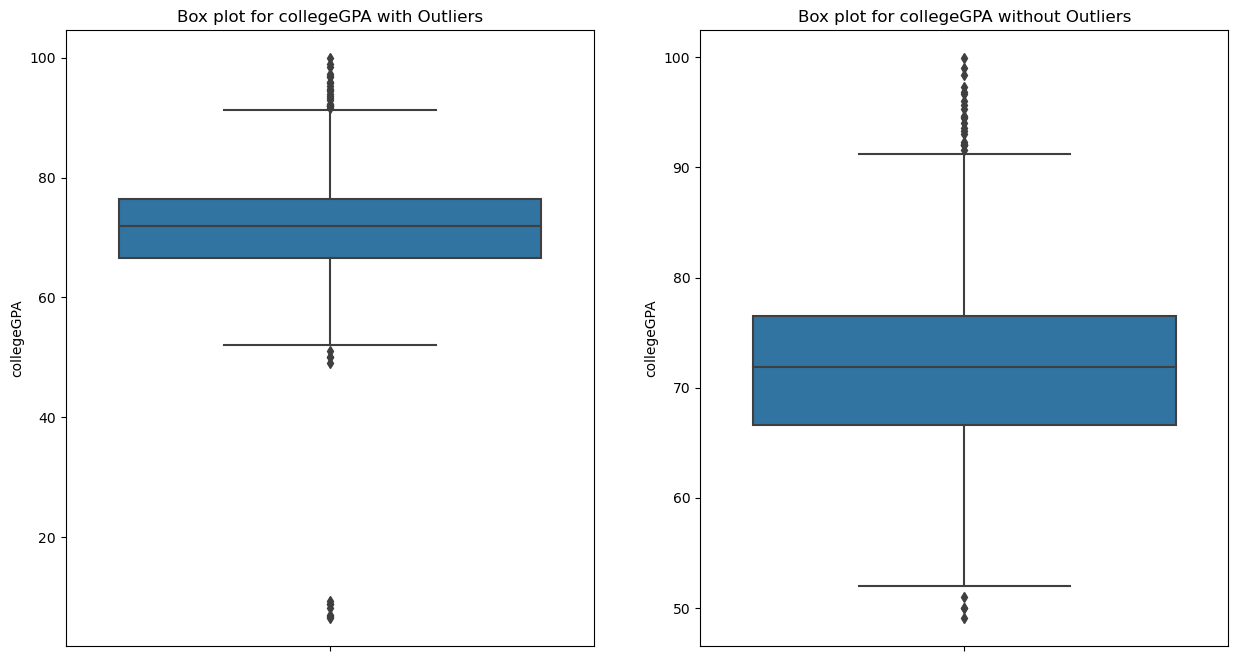

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.boxplot(y=df["collegeGPA"], ax=ax[0])
ax[0].set_title('Box plot for collegeGPA with Outliers')
clean_df = df[df.collegeGPA >= 20]
sns.boxplot(y=clean_df["collegeGPA"], ax=ax[1])
ax[1].set_title('Box plot for collegeGPA without Outliers')

##### `Observation` : In the Box plot of candidates college GPA, we observed that more of whisk was present in middle of 60 to 80. It indicates that a majority of candidates got 60% to 80% nearly . We plot 2 plots for with outliers and without outliers.

(-0.5, 399.5, 199.5, -0.5)

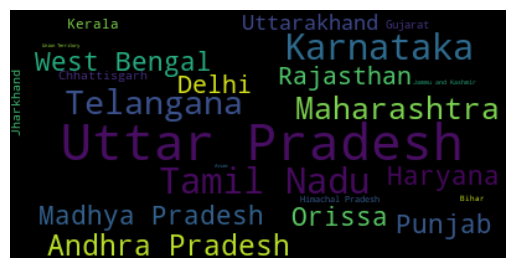

In [67]:
text = df['CollegeState'].value_counts()
    
wordcloud = WordCloud().generate_from_frequencies(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### `Observation` : In the above Word Cloud of Colle state , we can observe that most of candidates studied in ‘Uttar Pradesh’, ‘Karnataka’ and ‘Tamil Nadu’ respectively .

<AxesSubplot:ylabel='GraduationYear'>

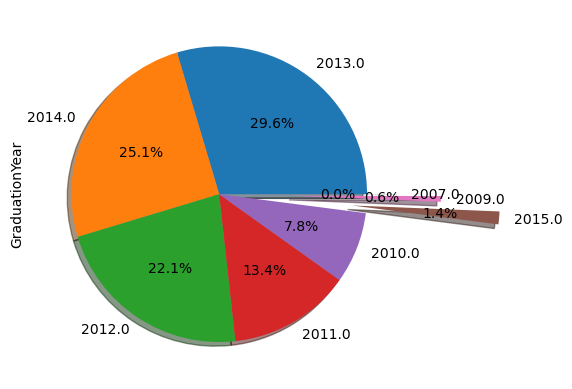

In [68]:
explode = (0, 0, 0, 0, 0, 0.9, 0.5, 0.2)
df['GraduationYear'].value_counts().plot.pie(autopct='%.1f%%', explode = explode, shadow = True)

##### `Observation` : In the above pie chart of Graduation year of candidates, we can observe that 2014, 2013 were most of candidates graduated respectively .

<Figure size 1500x700 with 0 Axes>

<AxesSubplot:>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'English'),
  Text(1, 0, 'Logical'),
  Text(2, 0, 'Quant'),
  Text(3, 0, 'Domain'),
  Text(4, 0, 'ComputerProgramming'),
  Text(5, 0, 'ElectronicsAndSemicon'),
  Text(6, 0, 'ComputerScience')])

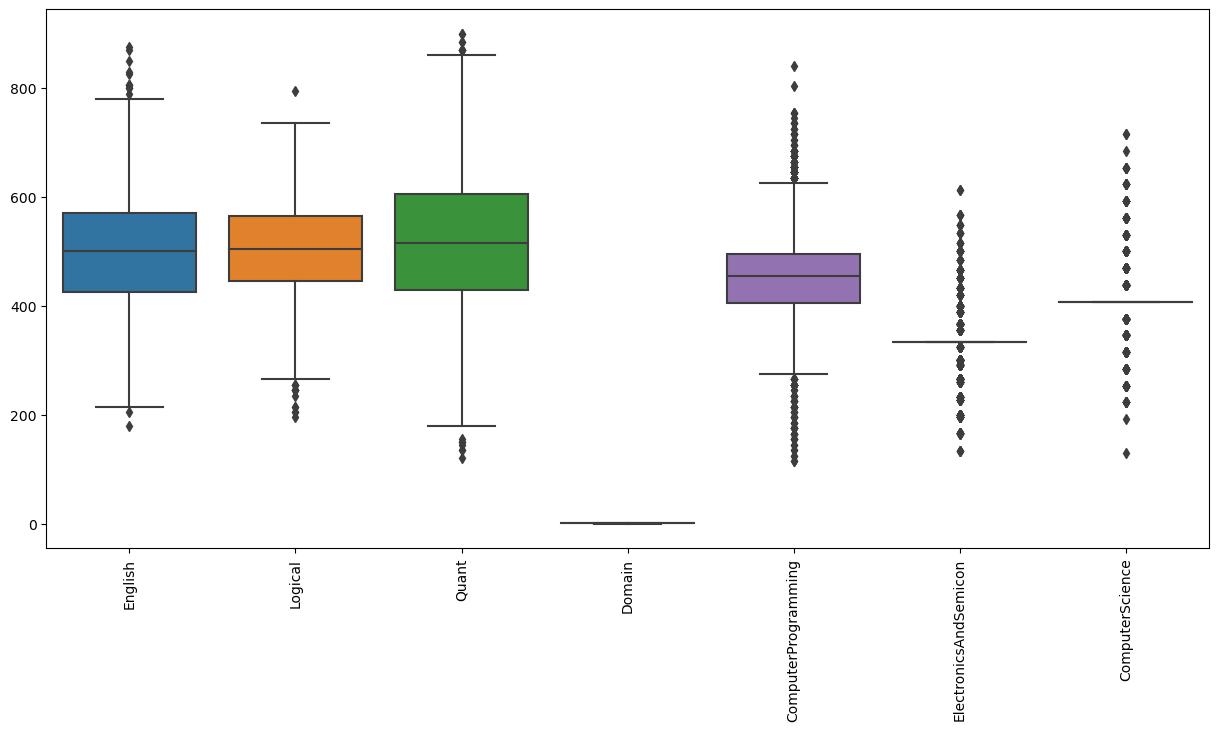

In [69]:
df1 = df[['English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience']]

plt.figure(figsize=(15,7))
sns.boxplot(data=df1)
plt.xticks(rotation=90)

##### `Observation` : In the Box plots of candidates scores in several exams, we can observe that most of candidates got 400 to 600 marks in ‘English’ , ‘Logical’ , ‘Quant’ , ‘Computer Science’ & ‘Computer Programming’ . And, ‘Electronics And Semicon’ exam most of students got nearly 300 to 350 marks ,  in ‘Domain’ exam they got 0 to 1 .

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

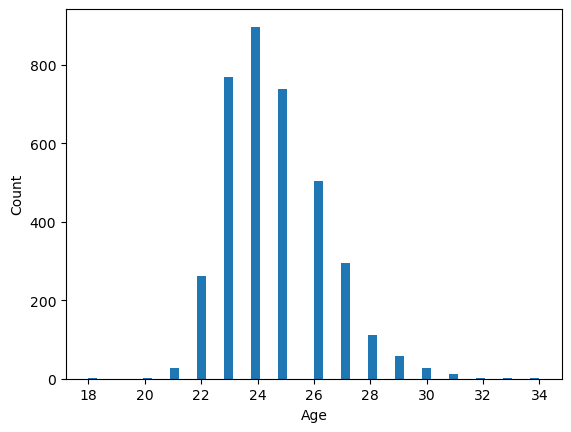

In [70]:
df.Age.plot.hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Count')

##### `Observation` : In the above histogram of Age of candidates, we can observe that most of candidates are 24 yrs old .

<AxesSubplot:xlabel='Tenure'>

Text(0.5, 0, 'Tenure')

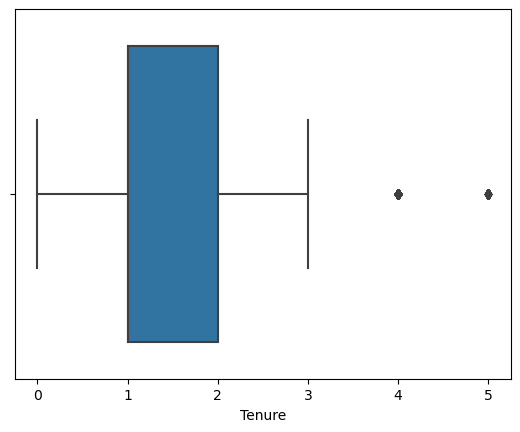

In [71]:
sns.boxplot(df['Tenure'])
plt.xlabel('Tenure')

##### `Observation` : In the Box plot of candidates Tenure(Experience), we can observe that most of candidates got 1 to 2 yrs experience only .

## <<< `Bivariate Analysis` >>>

In [72]:
pivot = pd.pivot_table(index = 'JobCity',values = 'Salary',data = df).sort_values('Salary', ascending=False)

In [73]:
pivot

Salary
JobCity                     
KALMAR, SWEDEN     2300000.0
LONDON             2000000.0
JOHANNESBURG       1745000.0
ANGUL              1300000.0
MAHARAJGANJ        1200000.0
...                      ...
METTUR, TAMILNADU   100000.0
BURDWAN             100000.0
ERNAKULAM, AMBALA    95000.0
MUVATTUPUZHA         65000.0
HOWRAH               60000.0

[184 rows x 1 columns]

<AxesSubplot:title={'center':'Bar plot of Date of joining the company'}, xlabel='JobCity'>

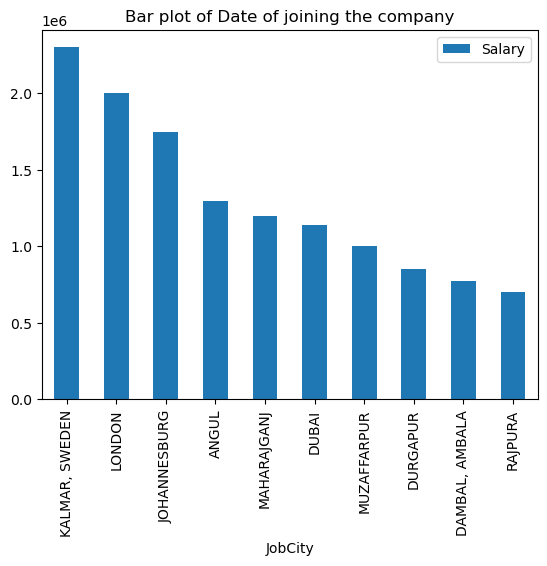

In [74]:
pivot[:10].plot(kind='bar', title='Bar plot of Date of joining the company')

##### `Observation` : In the above bar plot of ‘Job city’ VS ‘Salary’ , we can observe that the candidates whom Job city as ‘Sweden’ are getting highest salary among all of the candidates . 

<AxesSubplot:title={'center':'Bar plot of Date of joining the company'}, xlabel='DOJ', ylabel='Salary count'>

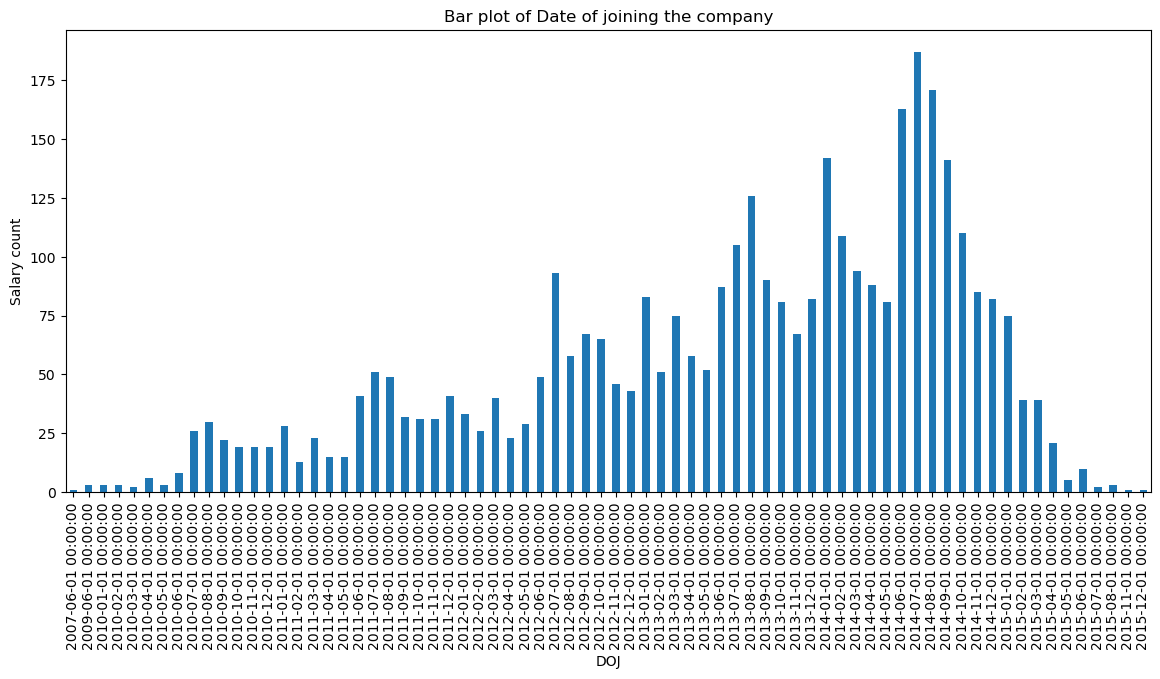

In [75]:
df['DOJ'] = pd.to_datetime(df['DOJ'])

df.groupby('DOJ')['Salary'].count().plot(kind='bar', ylabel='Salary count', figsize=(14, 6), title='Bar plot of Date of joining the company')

##### `Observation` : In the above bar plot of Groupby table of  ‘DOJ’ , ‘Salary’ , we can observe that most of candidates who joined in 2014 were getting highest Salary .

<AxesSubplot:title={'center':'Bar plot of Date of leaving the company'}, xlabel='DOL', ylabel='Salary count'>

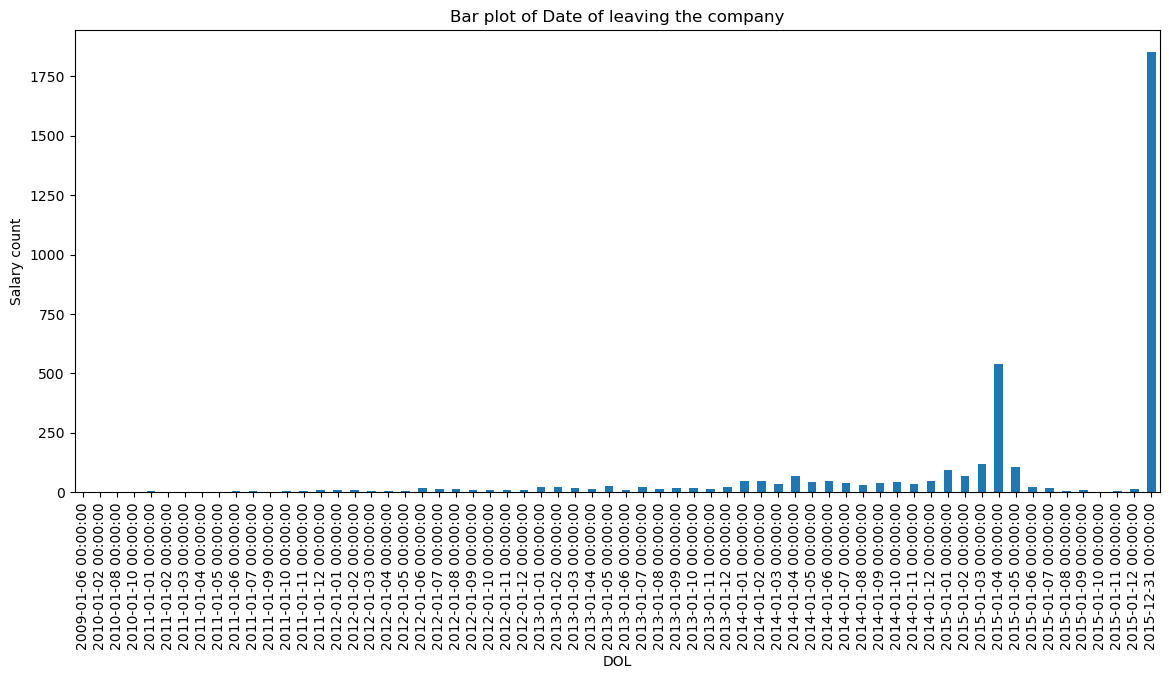

In [76]:
df['DOL'] = pd.to_datetime(df['DOL'])

df.groupby('DOL')['Salary'].count().plot(kind='bar', ylabel='Salary count', figsize=(14, 6), title='Bar plot of Date of leaving the company')

##### `Observation` : In the above bar plot of Groupby table of  ‘DOL’ , ‘Salary’ , we can observe that most of candidates who left in 2014 and 2015 were got highest Salary .

In [77]:
grouped_data = df.groupby('Salary')['Designation'].max().reset_index()

In [78]:
grouped_data

Salary                Designation
0      35000           systems engineer
1      40000    product design engineer
2      45000        training specialist
3      50000          marketing analyst
4      60000              web developer
..       ...                        ...
168  2500000     software test engineer
169  2600000      application developer
170  3000000                 programmer
171  3500000  assistant system engineer
172  4000000   senior software engineer

[173 rows x 2 columns]

In [79]:
sorted_df = grouped_data.tail(5).reset_index(drop=True)

In [80]:
sorted_df

Salary                Designation
0  2500000     software test engineer
1  2600000      application developer
2  3000000                 programmer
3  3500000  assistant system engineer
4  4000000   senior software engineer

Text(0.5, 0, 'Salary')

Text(0, 0.5, 'Designation')

Text(0.5, 1.0, 'Horizontal Bar Plot for Top 5 Designation by Salary')

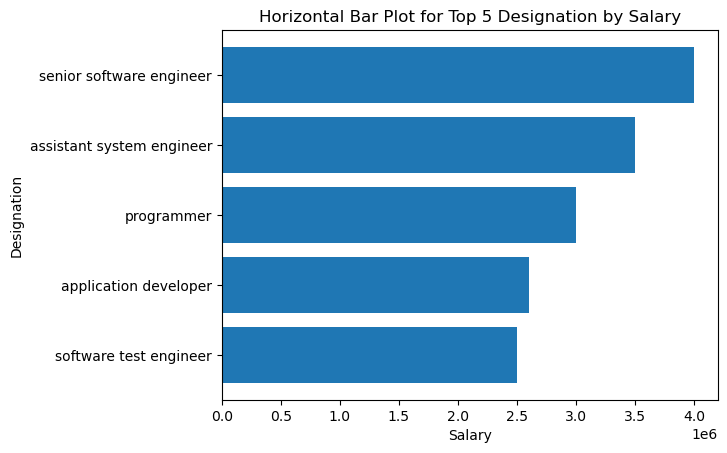

In [81]:
fig, ax = plt.subplots()
bars = ax.barh(sorted_df['Designation'], sorted_df['Salary'])

ax.set_xlabel('Salary')
ax.set_ylabel('Designation')
ax.set_title('Horizontal Bar Plot for Top 5 Designation by Salary')

##### `Observation` : Senior Software Engineer getting highest salary i.e., nearly 4Lakhs and Assistant System Engineer is getting 2nd highest salary i.e., nearly 3.5Lakhs.

<AxesSubplot:xlabel='10percentage', ylabel='Count'>

<AxesSubplot:xlabel='12graduation', ylabel='Count'>

<AxesSubplot:xlabel='12percentage', ylabel='Count'>

<AxesSubplot:xlabel='CollegeTier', ylabel='Count'>

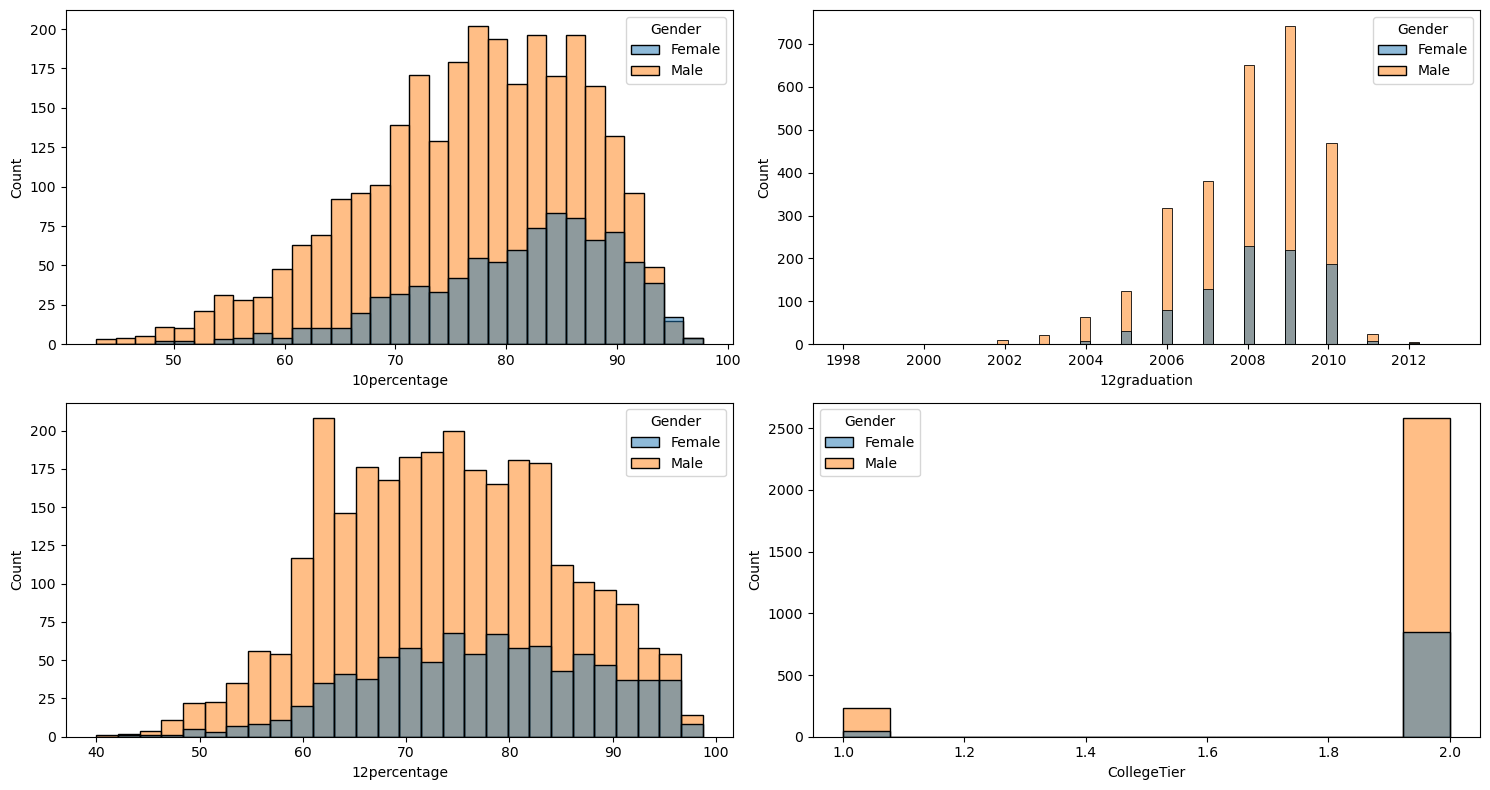

In [82]:
# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# Plot density plots for each group
sns.histplot(ax=ax[0, 0], data=df, x='10percentage', hue='Gender')
sns.histplot(ax=ax[0, 1], data=df, x='12graduation', hue='Gender')
sns.histplot(ax=ax[1, 0], data=df, x='12percentage', hue='Gender')
sns.histplot(ax=ax[1, 1], data=df, x='CollegeTier', hue='Gender')
# Show the plot
plt.tight_layout()
plt.show()

##### `Observation` : In the above histograms, we can observe that in all columns  '10percentage’ ,  '12percentage’,  '12graduation’ &  'College Tier’ most of the candidates are Male compare to Female .

<AxesSubplot:xlabel='Degree', ylabel='Count'>

<AxesSubplot:xlabel='Specialization', ylabel='Count'>

<AxesSubplot:xlabel='CollegeCityTier', ylabel='Count'>

<AxesSubplot:xlabel='CollegeState', ylabel='Count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

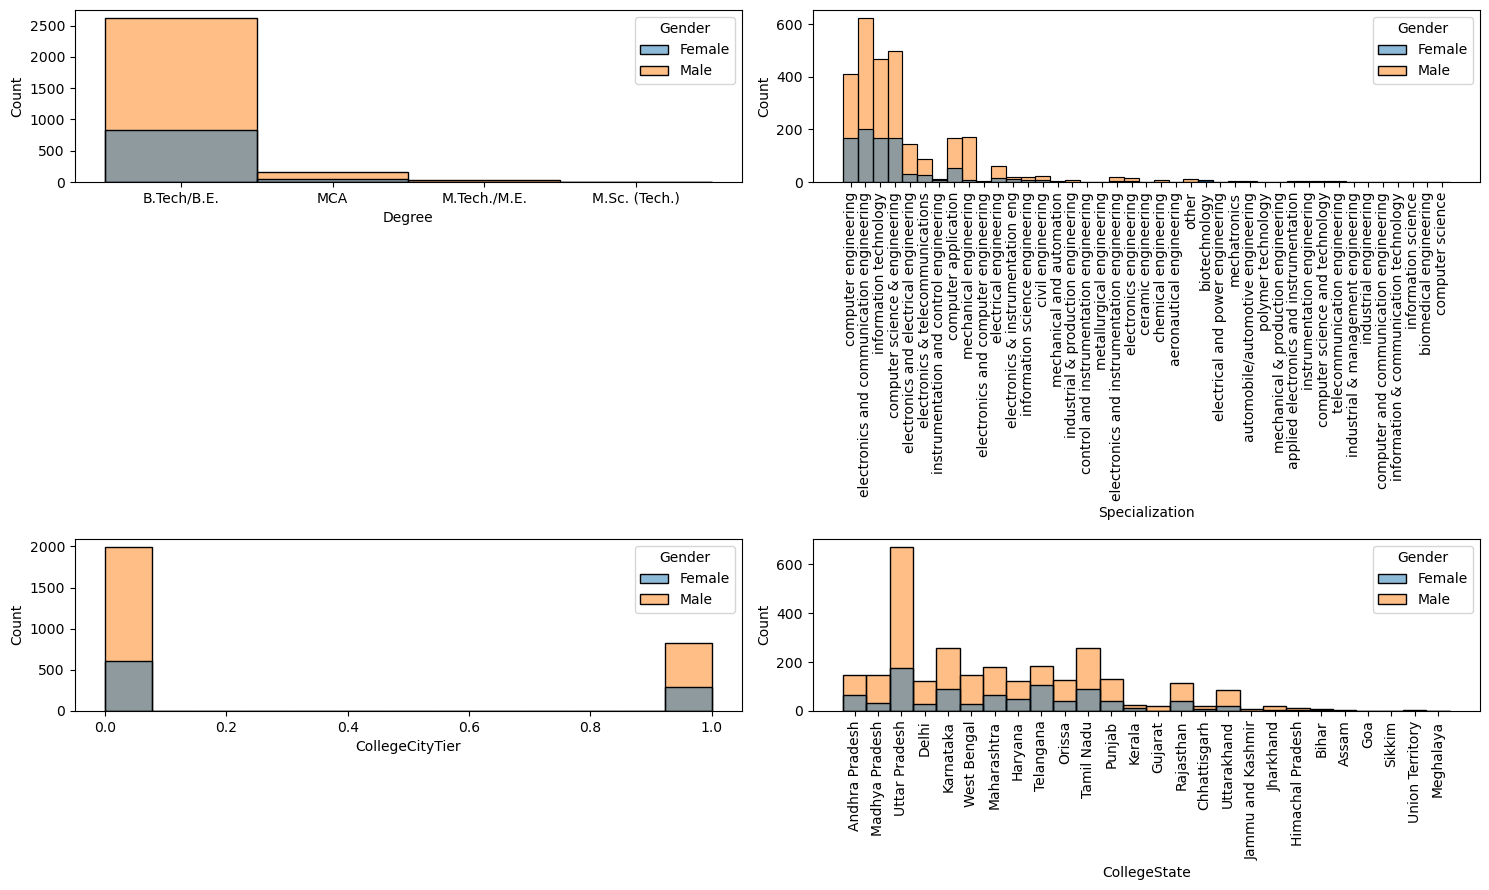

In [83]:
# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 9))

# Plot density plots for each group
sns.histplot(ax=ax[0, 0], data=df, x='Degree', hue='Gender')
sns.histplot(ax=ax[0, 1], data=df, x='Specialization', hue='Gender')
sns.histplot(ax=ax[1, 0], data=df, x='CollegeCityTier', hue='Gender')
sns.histplot(ax=ax[1, 1], data=df, x='CollegeState', hue='Gender')
plt.xticks(rotation=90)

# Use the pyplot interface to change just one subplot...
plt.sca(ax[0, 1])
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

##### `Observation` : In the above histograms, we can observe that in all columns  ‘Degree’ ,  'Specialization’,  'College City Tier’ &  College State’ most of the candidates are Male compare to Female .

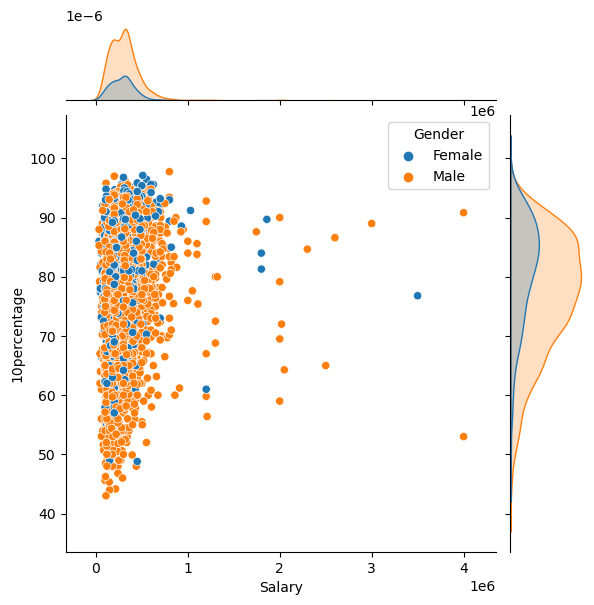

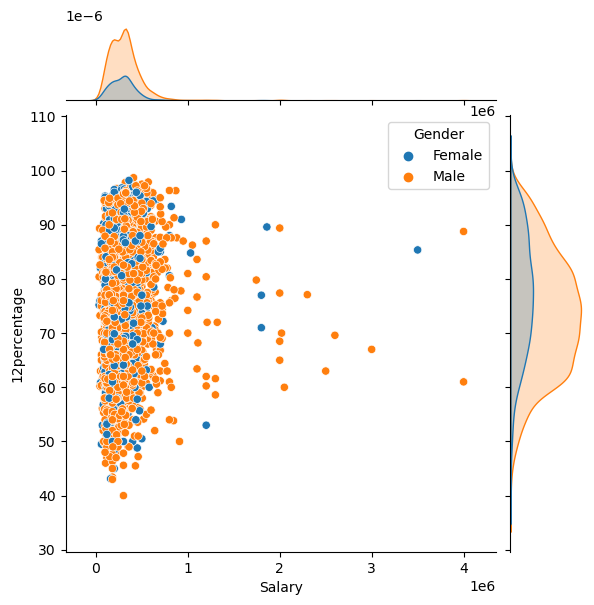

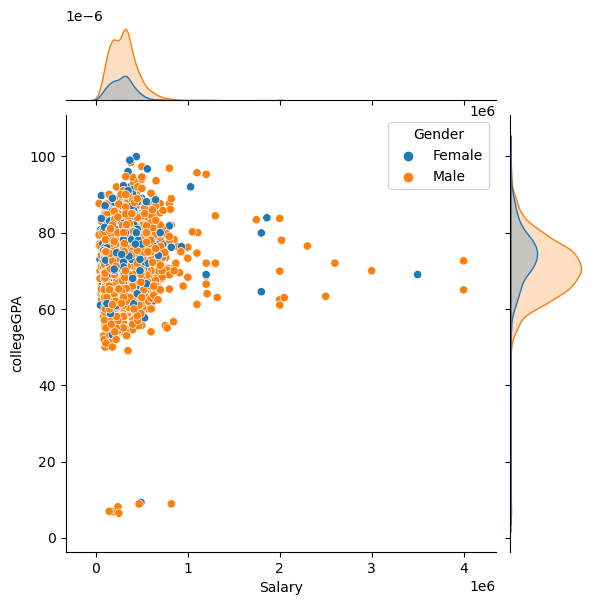

In [84]:
sns.jointplot(data=df, x="Salary", y="10percentage", hue="Gender")
sns.jointplot(data=df, x="Salary", y="12percentage", hue="Gender")
sns.jointplot(data=df, x="Salary", y="collegeGPA", hue="Gender")

##### `Observation` : A clear trend in the dataset suggests that individuals with 10percentage, 12percentage and college GPAs falling within the 50-90% range tend to report higher salaries.

<Figure size 1800x700 with 0 Axes>

Text(-0.15000000000000002, 837.03, '837.0')

Text(0.8500000000000001, 55.03, '55.0')

Text(1.85, 7.03, '7.0')

Text(2.8499999999999996, nan, 'nan')

Text(0.24999999999999997, 2619.03, '2619.0')

Text(1.25, 166.03, '166.0')

Text(2.25, 27.03, '27.0')

Text(3.25, 1.03, '1.0')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'B.Tech/B.E.'),
  Text(1, 0, 'MCA'),
  Text(2, 0, 'M.Tech./M.E.'),
  Text(3, 0, 'M.Sc. (Tech.)')])

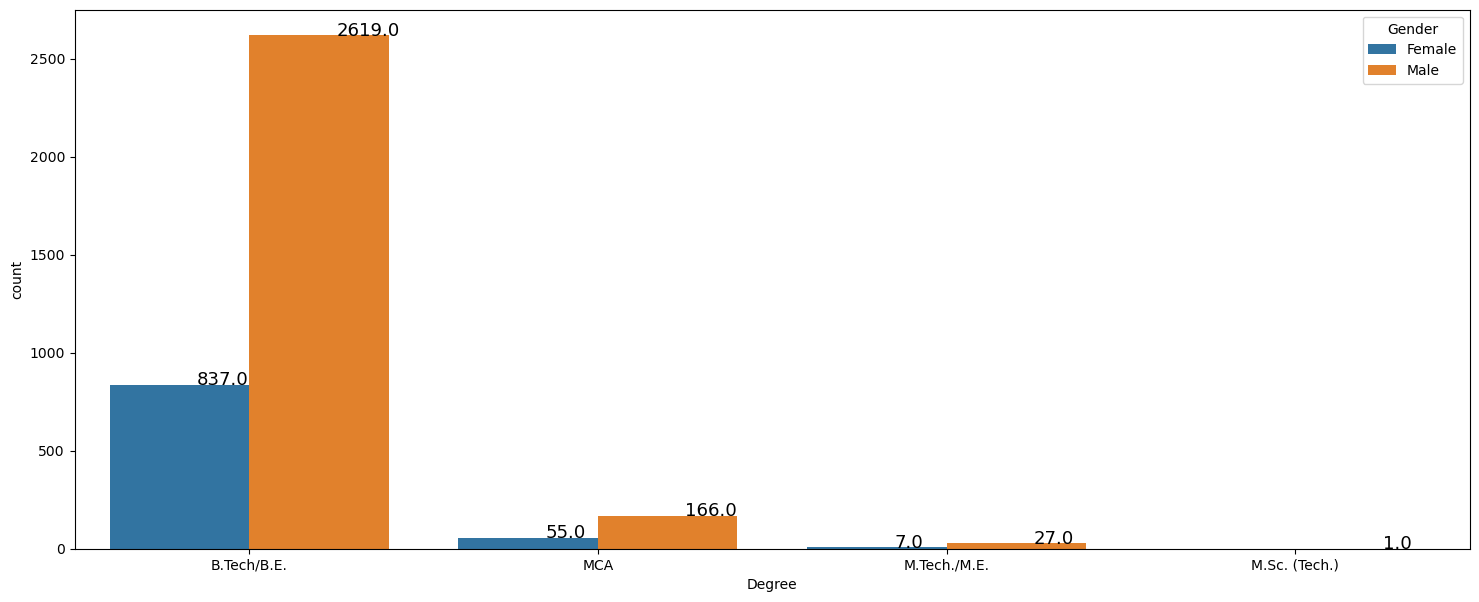

In [85]:
#### Data ploting in countplot for 'Degree' from DataFrame

plt.figure(figsize=(18,7))
ax = sns.countplot(x = df.Degree, hue = df.Gender)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03), fontsize=13)
plt.xticks(rotation=0)

##### `Observation` : In the count plot of candidates ‘Degree’ VS ‘Gender’ , we observed that in all Degree’s   i.e., 'B.Tech/B.E.’ , 'MCA’ , 'M.Tech./M.E.’  and  'M.Sc. (Tech.)’  most of the candidates are Male compare to Female .

<Figure size 1500x700 with 0 Axes>

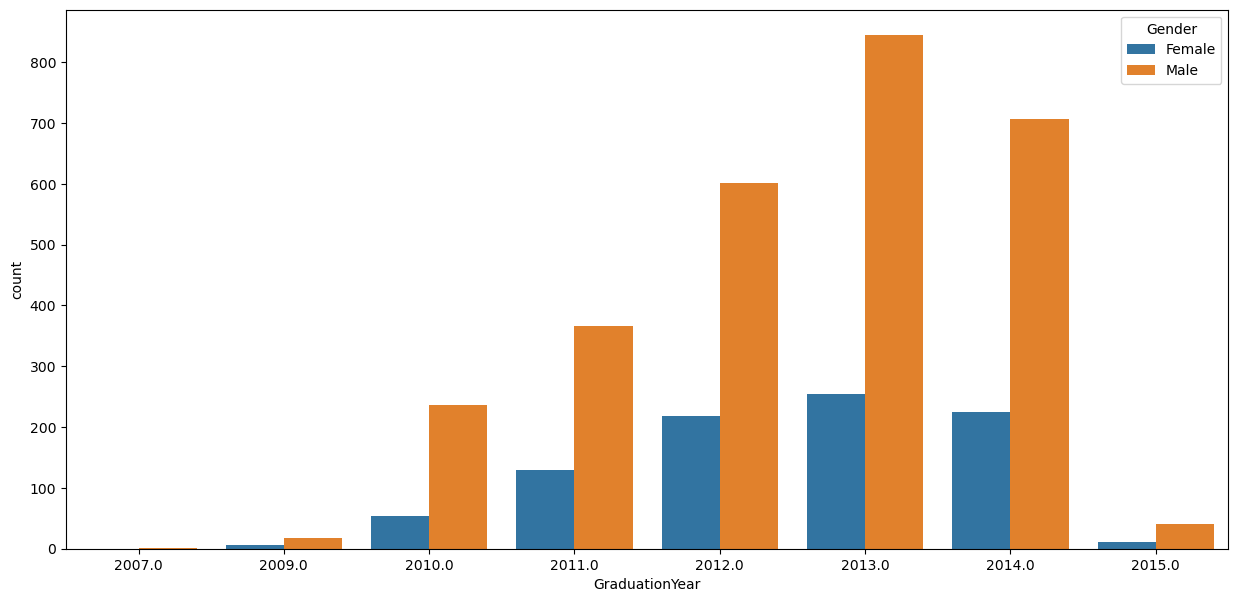

In [86]:
#### Data ploting in countplot for 'GraduationYear' from DataFrame

plt.figure(figsize=(15,7))
ax = sns.countplot(x = df.GraduationYear, hue = df.Gender)

##### `Observation` : In the count plot of candidates ‘Graduation year’ VS ‘Gender’ , we observed that in all years  i.e.,   2007 , 2009 , 2010 , 2011 , 2012 , 2013 and 2014 , 2015  most of the candidates are Male compare to Female .

<AxesSubplot:xlabel='English', ylabel='Density'>

<AxesSubplot:xlabel='Logical', ylabel='Density'>

<AxesSubplot:xlabel='Quant', ylabel='Density'>

<AxesSubplot:xlabel='Domain', ylabel='Density'>

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Density'>

<AxesSubplot:xlabel='ElectronicsAndSemicon', ylabel='Density'>

<AxesSubplot:xlabel='ComputerScience', ylabel='Density'>

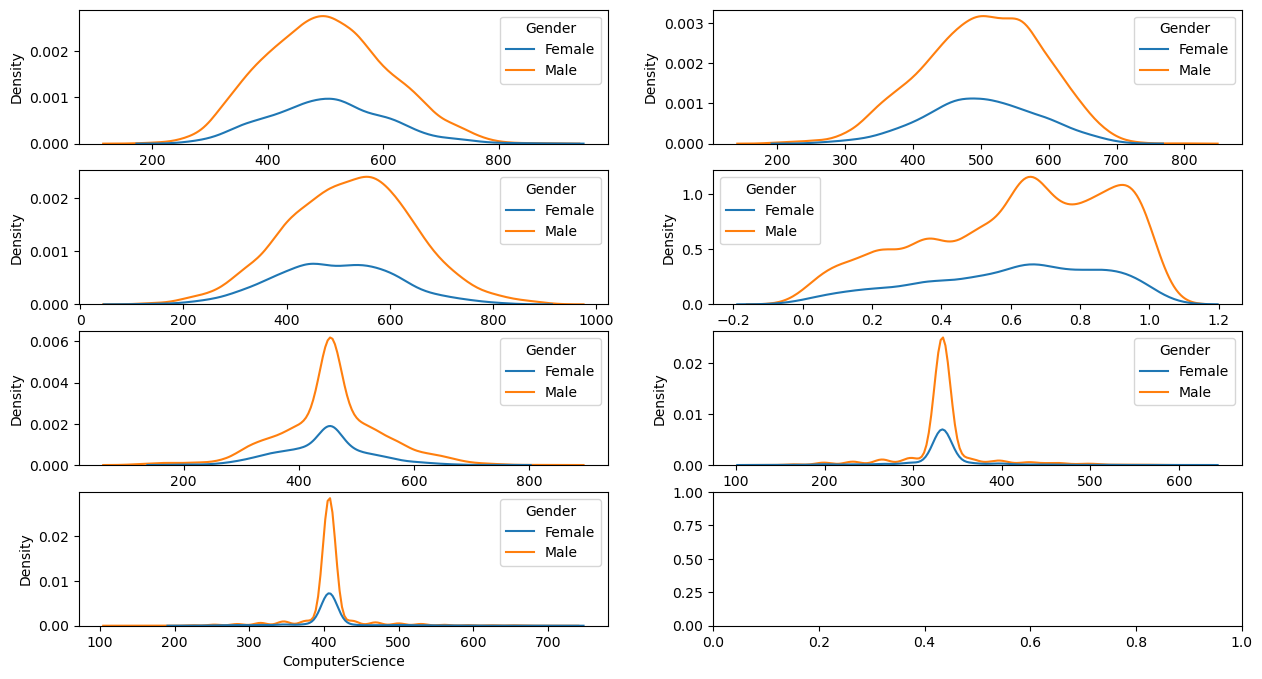

In [87]:
# Set up subplots
fig, ax = plt.subplots(4, 2, figsize=(15, 8))

# Plot density plots for each group
sns.kdeplot(ax=ax[0, 0], data=df, x='English', hue='Gender')
sns.kdeplot(ax=ax[0, 1], data=df, x='Logical', hue='Gender')
sns.kdeplot(ax=ax[1, 0], data=df, x='Quant', hue='Gender')
sns.kdeplot(ax=ax[1, 1], data=df, x='Domain', hue='Gender')
sns.kdeplot(ax=ax[2, 0], data=df, x='ComputerProgramming', hue='Gender')
sns.kdeplot(ax=ax[2, 1], data=df, x='ElectronicsAndSemicon', hue='Gender')
sns.kdeplot(ax=ax[3, 0], data=df, x='ComputerScience', hue='Gender')

##### `Observation` : In the KDE plots of candidates exam scores with hue as ‘Gender’ , we observed that by peak of curve in all exams such as ‘English’ , ‘Logical’ , ‘Quant’ , ‘Domain’ , ‘Computer Programming’ , 'Electronics And Semicon’ & 'Computer Science' most of the candidates are Male compare to Female .

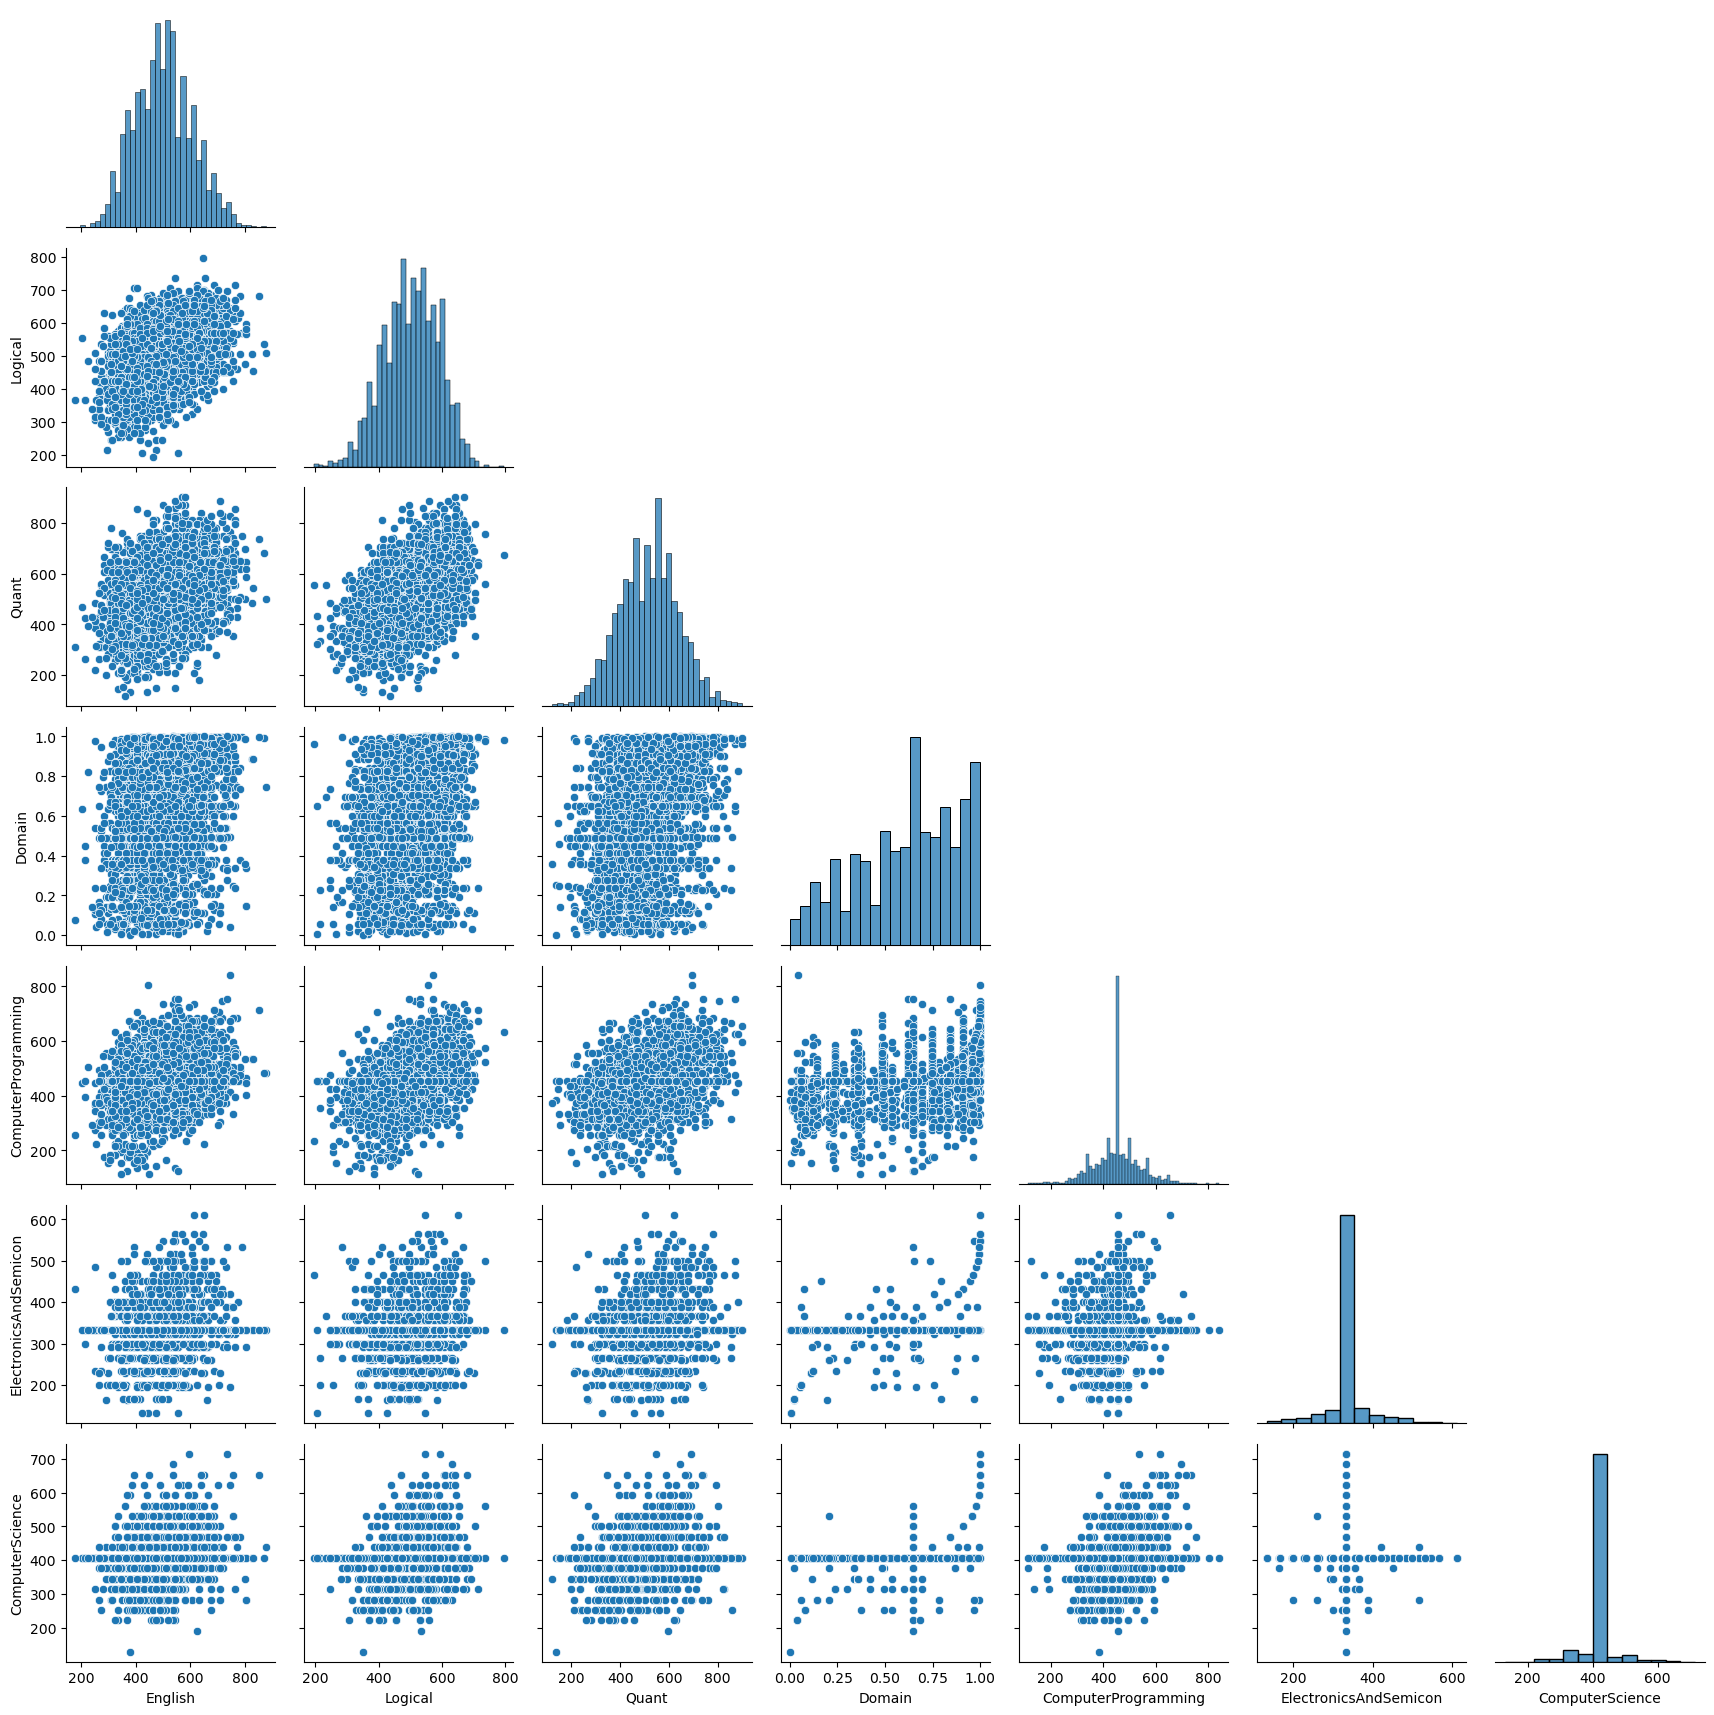

In [88]:
g = sns.PairGrid(df1, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

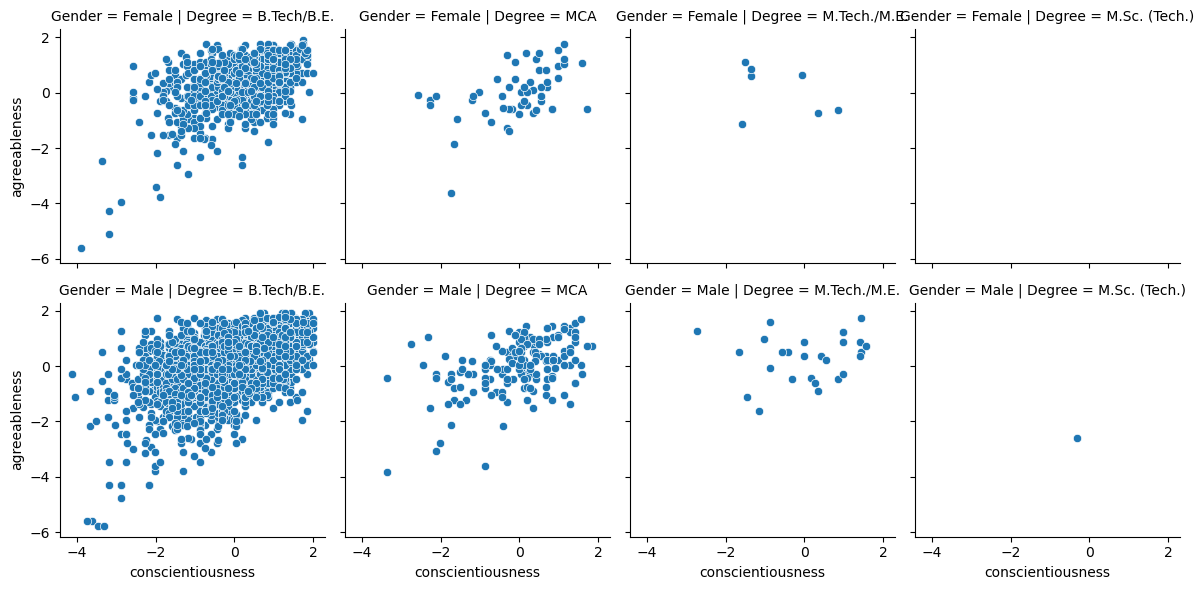

In [89]:
g = sns.FacetGrid(df, col="Degree", row="Gender")
g.map(sns.scatterplot, "conscientiousness", "agreeableness")

##### `Observation` :  In the Facet grid using scatter plot for mapping of candidates  few Scores in one of the sections of AMCAT’s personality test with ‘Gender’ as row & ‘Degree’ as column, we observed that in all exams such as ‘conscientiousness’ & 'agreeableness' most of the candidates are Male compare to Female who has  ‘B.Tech/B.E’ & ‘MCA’ respectively .

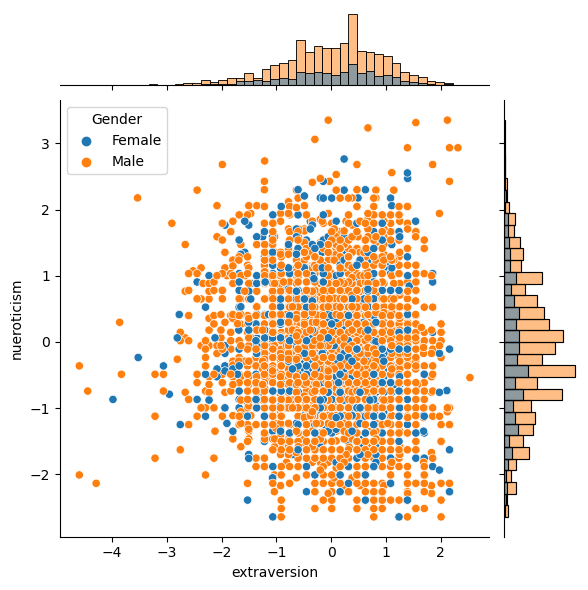

In [90]:
g = sns.JointGrid(data=df, x="extraversion", y="nueroticism", hue="Gender")
g.plot(sns.scatterplot, sns.histplot)

##### `Observation` : In the Joint Grid using scatter plot for mapping of candidates few Scores of the sections of AMCAT’s personality test with hue as ‘Gender’ , we observed that in few sections of  personality test such as ‘extraversion’ & ‘Nueroticism' most of the candidates are Male compare to Female .

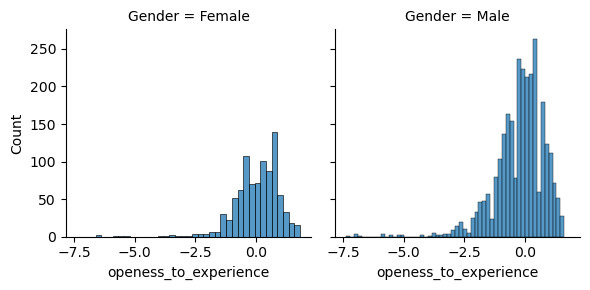

In [91]:
g = sns.FacetGrid(df, col="Gender")
g.map_dataframe(sns.histplot, x="openess_to_experience")

##### `Observation` : In the Facet grid using histogram for mapping of candidates Scores of one of the  sections of AMCAT’s personality test ‘openess_to_experience’ with column as ‘Gender’ , we observed that most of the candidates are Male compare to Female .

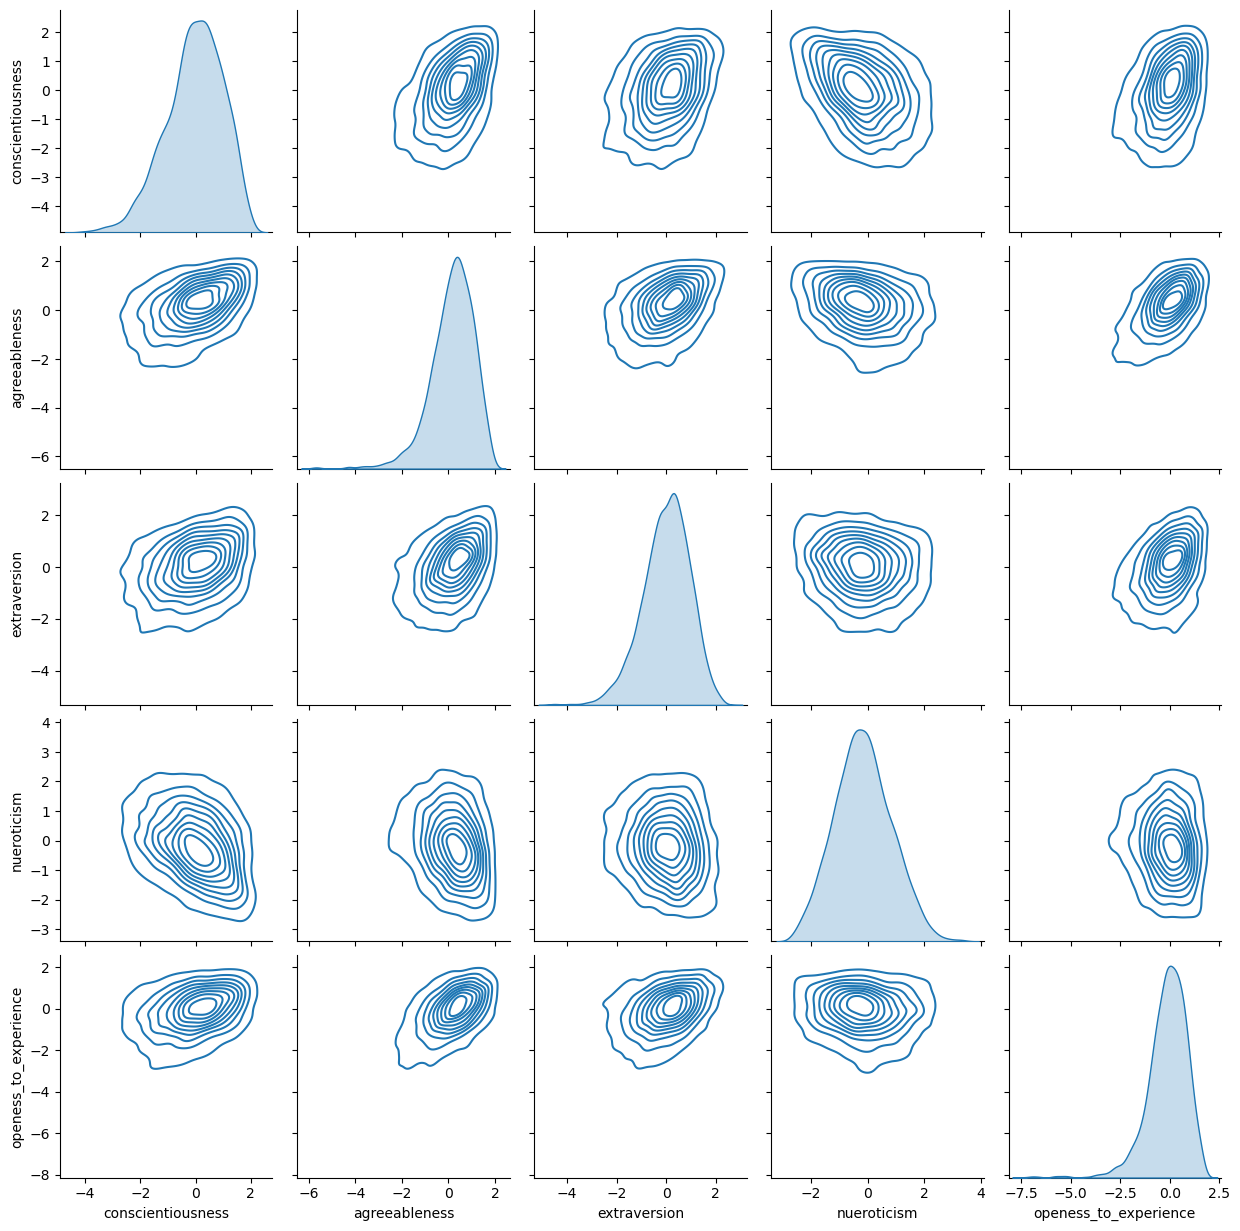

In [92]:
df2 = df[['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']]
sns.pairplot(df2, kind="kde")

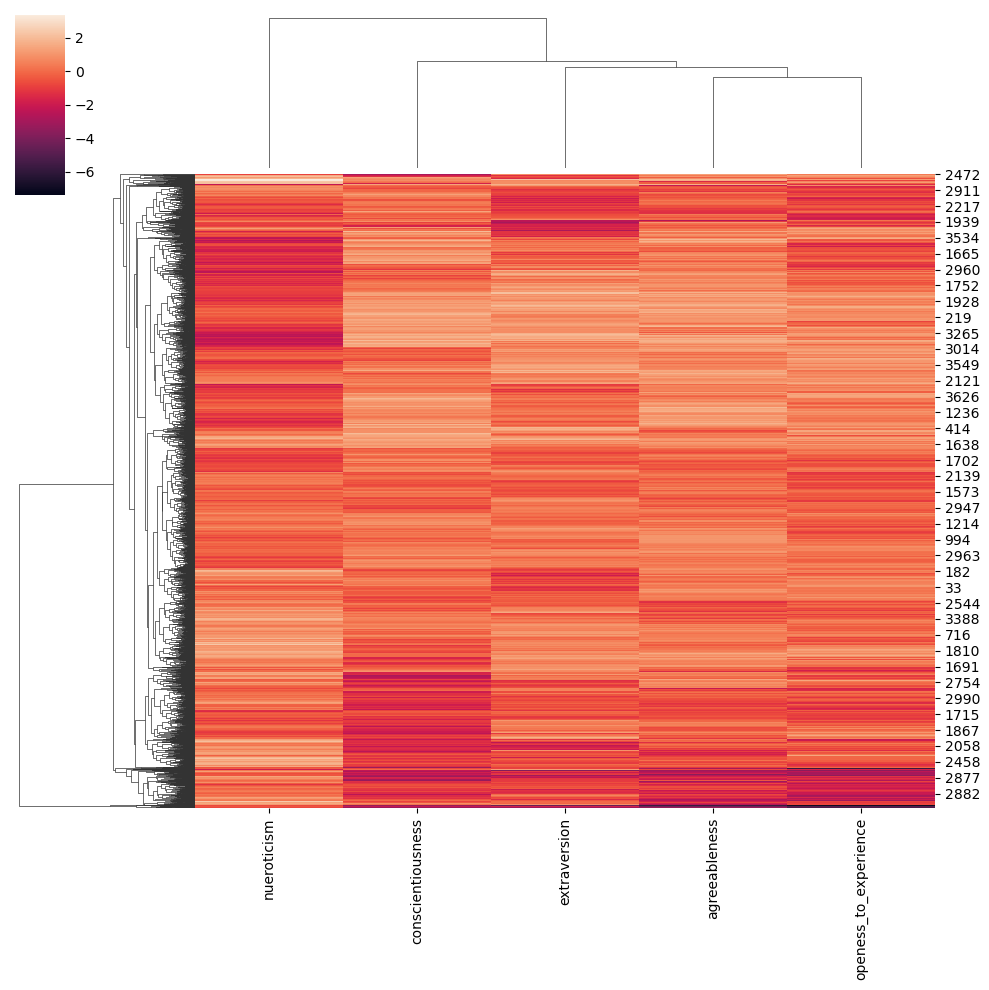

In [93]:
sns.clustermap(df2)

##### `Observation` : Plot a matrix using hierarchical clustering to arrange the rows and columns. We took Scores of the sections of AMCAT’s personality test as new dataframe, we plot for that 5 sections of AMCAT’s personality test in clustering.

In [94]:
cross_tab = pd.crosstab(index=df['Gender'], columns=df['JobCity'])

In [95]:
cross_tab

JobCity  AGRA  AHMEDABAD  AHMEDNAGAR  AL JUBAIL,SAUDI ARABIA  ALLAHABAD  \
Gender                                                                    
Female      0          1           0                       0          1   
Male        2         14           2                       1          0   

JobCity  ALWAR  AMBALABALA  ANGUL  ARIYALUR  ASANSOL  ...  UDAIPUR  UNA  \
Gender                                                ...                 
Female       0           0      0         0        0  ...        2    1   
Male         1           3      1         1        1  ...        1    0   

JobCity  UNNAO  VADODARA  VANDAVASI  VARANASI  VELLORE  VIJAYAWADA  VIZAG  \
Gender                                                                      
Female       0         0          1         0        1           1      2   
Male         2         2          0         1        0           1      9   

JobCity  YAMUNA NAGAR  
Gender                 
Female              0  
Male                1  

[2 rows x 184 columns]

<AxesSubplot:xlabel='Gender'>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'count of JobCity')

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

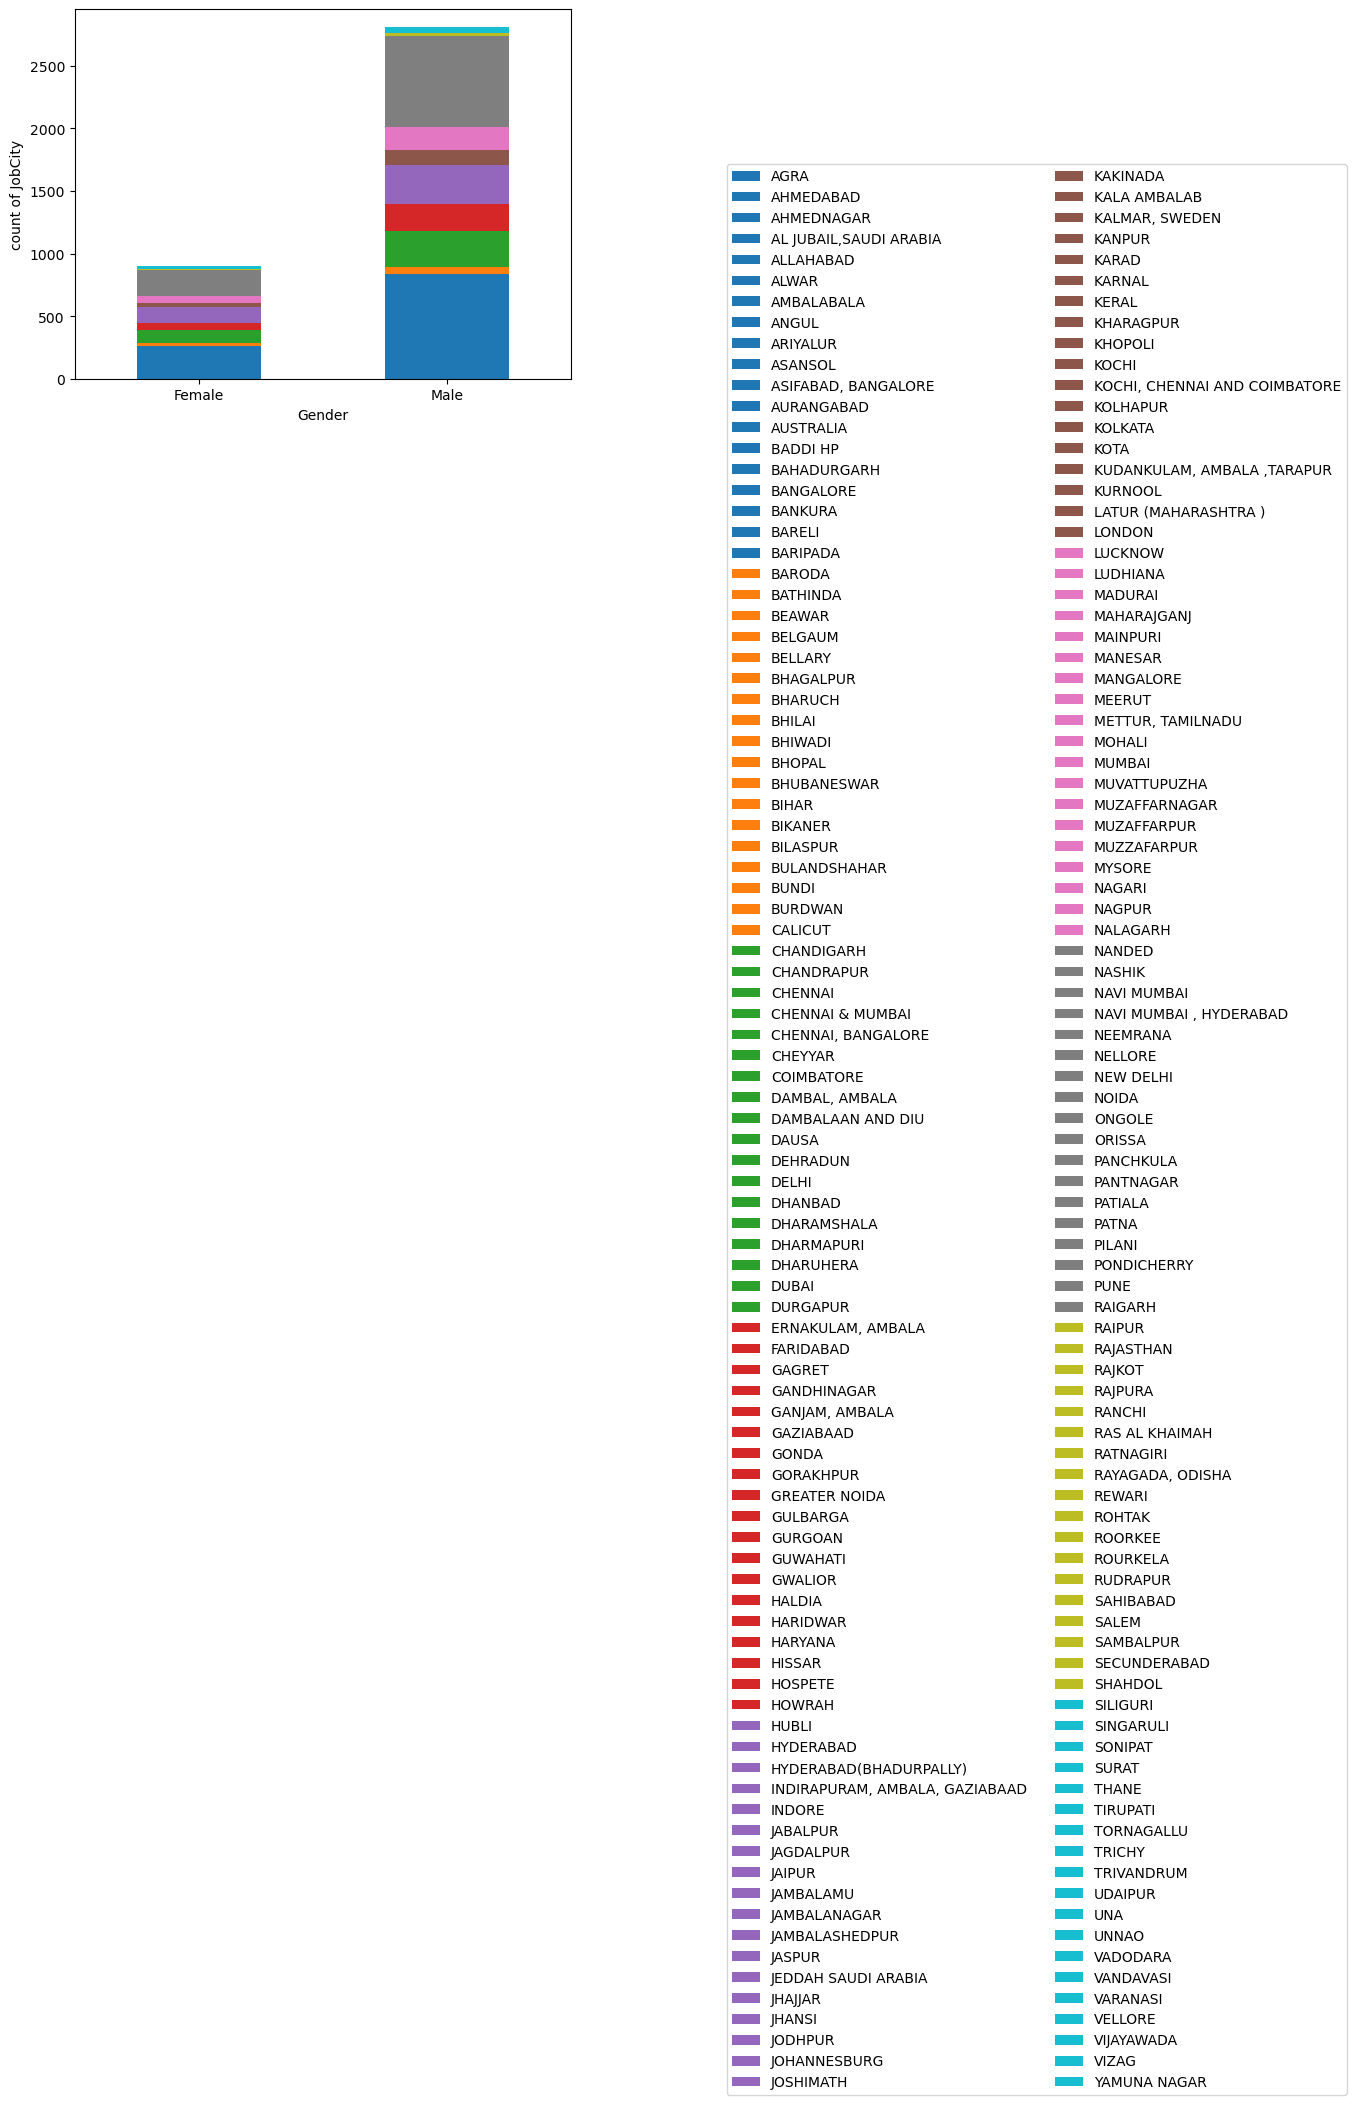

In [96]:
cross_tab.plot(kind='bar', stacked=True, colormap='tab10')
plt.legend(bbox_to_anchor=(1.3, 0.6), ncol=2)
plt.xlabel("Gender")
plt.ylabel("count of JobCity")
plt.xticks(rotation=0)
plt.show()

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot:>

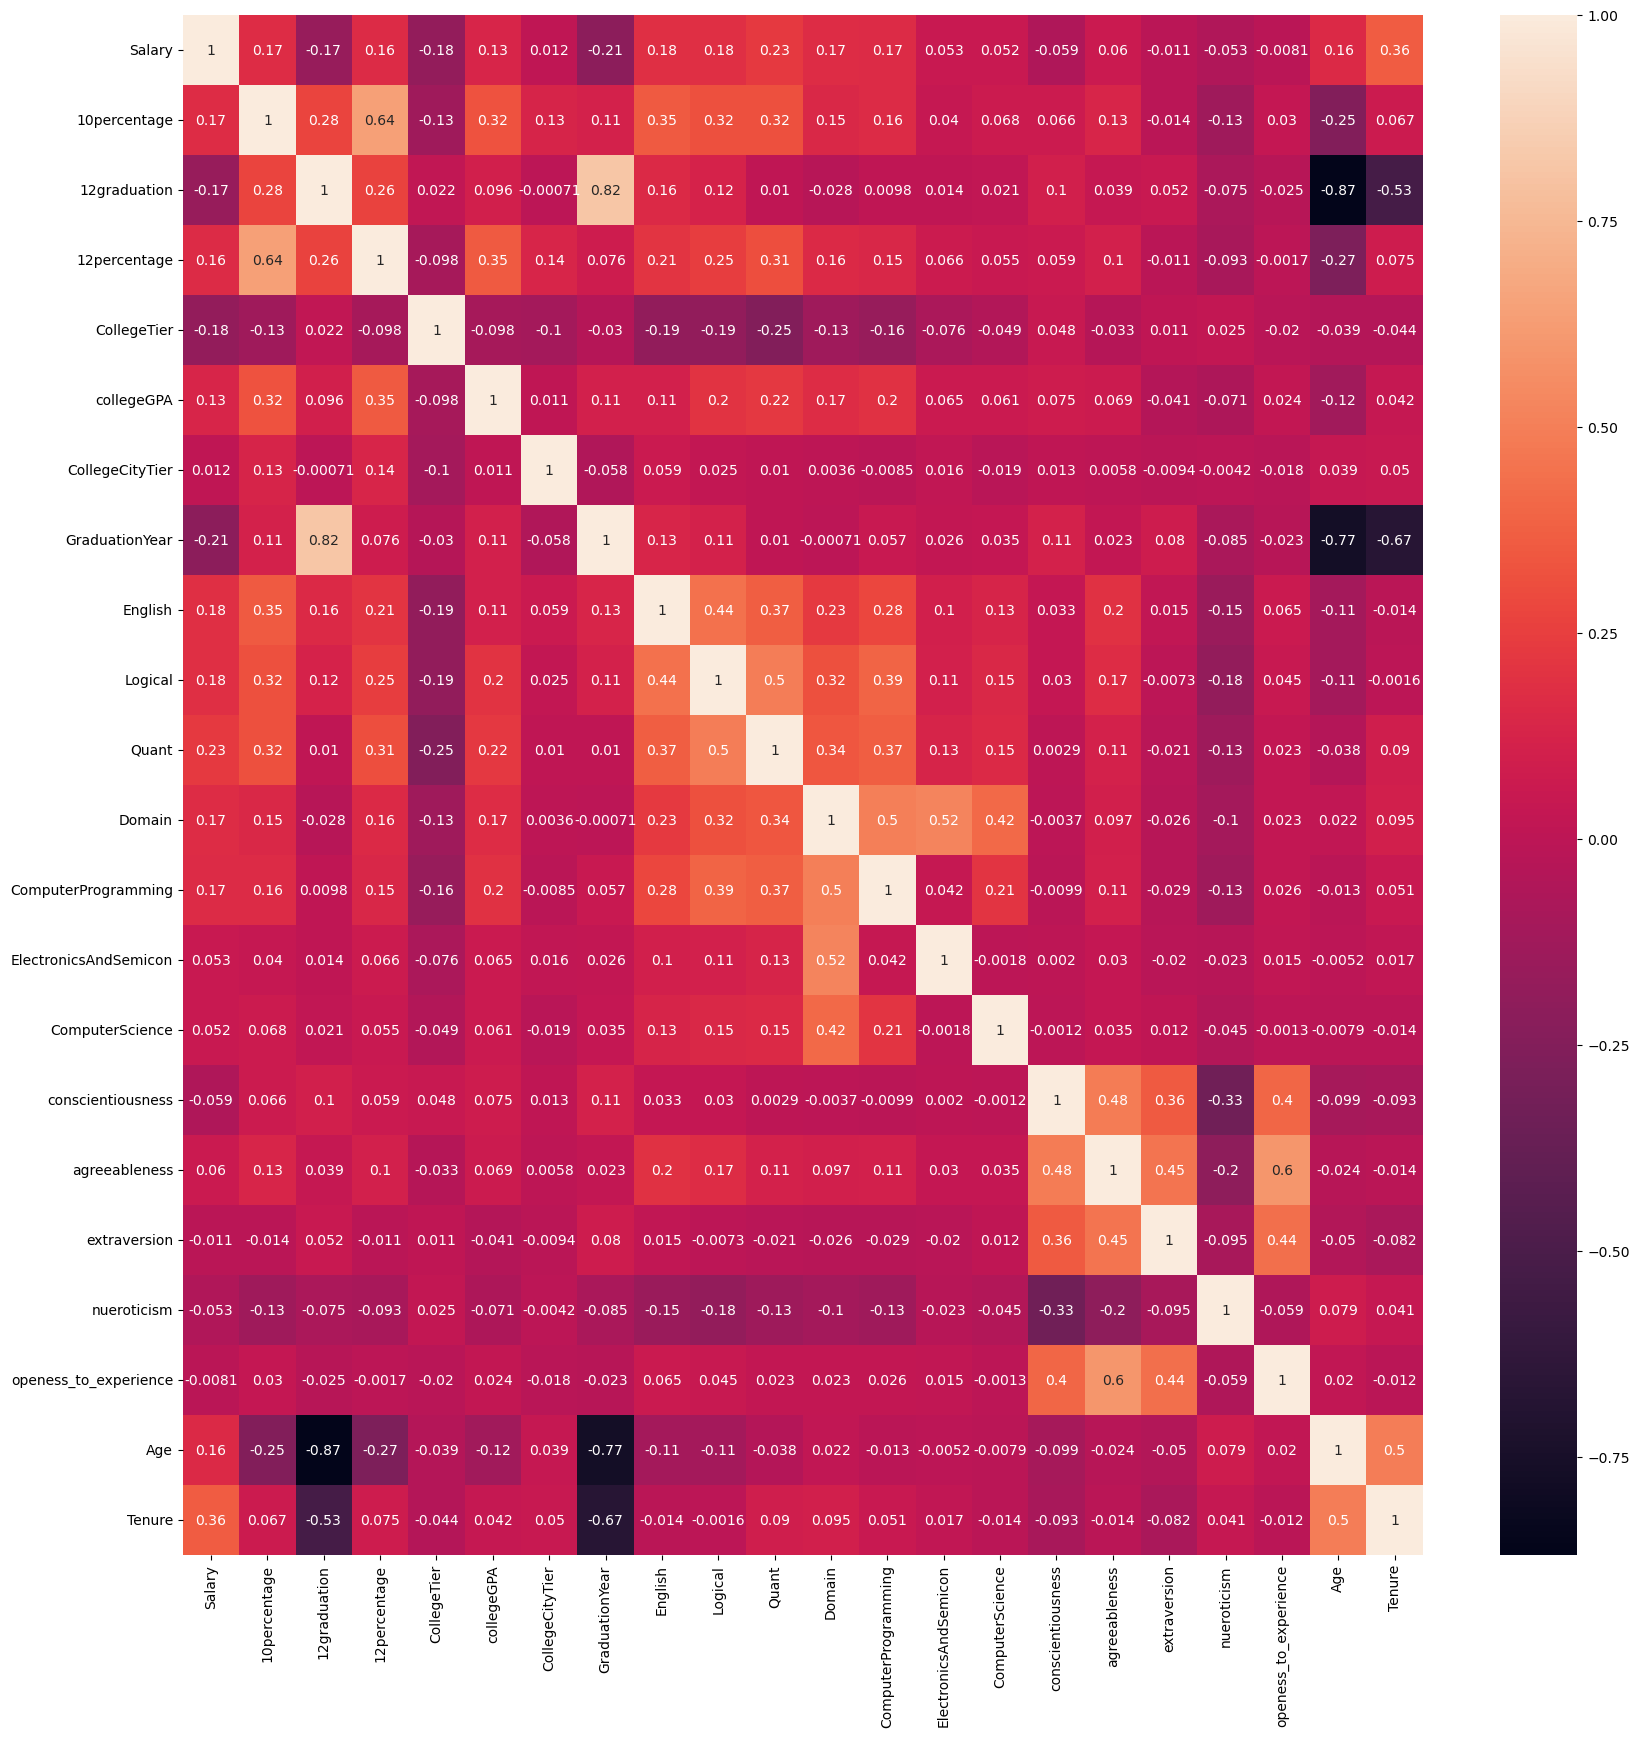

In [97]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

##### `Observation` :  Plot rectangular data as a color-encoded matrix from all numerical columns of given dataset.

<AxesSubplot:title={'center':'Salary per CollegeTier'}, ylabel='CollegeTier'>

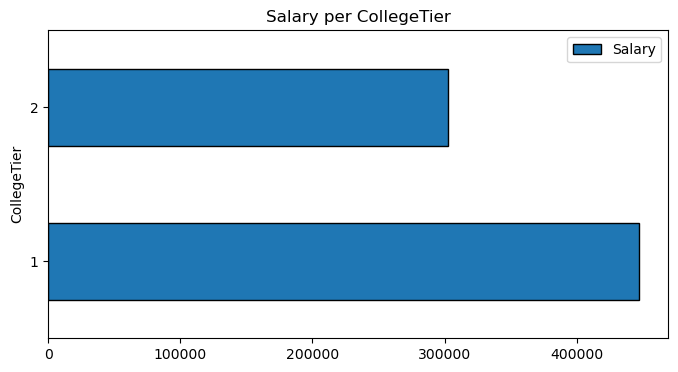

In [98]:
pd.pivot_table(index ='CollegeTier',values ='Salary',data = df).plot(kind = 'barh',title = 'Salary per CollegeTier',figsize = (8,4),ec = 'k')

##### `Observation` : College within Tier 1 offers high salary as compared to the colleges in Tier 2. Colleges in Tier 2 offers below overall average salary. 

<AxesSubplot:title={'center':'Salary per CollegeCityTier'}, ylabel='CollegeCityTier'>

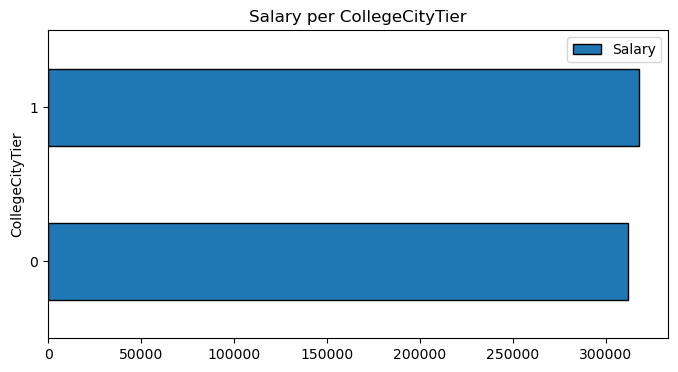

In [99]:
pd.pivot_table(index ='CollegeCityTier',values ='Salary',data = df).plot(kind = 'barh',title = 'Salary per CollegeCityTier',figsize = (8,4),ec = 'k')

##### `Observation` : Cities under Tier 1 and 2 offers almost same salaries to student.

In [100]:
df.groupby(['JobCity'],as_index=False).agg({'Salary':['min','max','mean']})

JobCity  Salary                  
                                min     max      mean
0                      AGRA  100000  200000  150000.0
1                 AHMEDABAD   80000  715000  290000.0
2                AHMEDNAGAR  310000  335000  322500.0
3    AL JUBAIL,SAUDI ARABIA  360000  360000  360000.0
4                 ALLAHABAD  225000  225000  225000.0
..                      ...     ...     ...       ...
179                VARANASI  510000  510000  510000.0
180                 VELLORE  200000  200000  200000.0
181              VIJAYAWADA  240000  300000  270000.0
182                   VIZAG  105000  325000  180000.0
183            YAMUNA NAGAR  240000  240000  240000.0

[184 rows x 4 columns]

##### `Observation` : In the above Groupby table, we use ‘Job city’,  ‘Salary’ as index and values. Where we use min, max and mean as aggregation function .

## >>> `Research Questions` <<<

### Claim 1 : -  Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

* * way - 1 :

In [101]:
df.loc[df['Specialization'] == 'computer science & engineering', 'Designation']

6       java software engineer
18         data entry operator
24          programmer analyst
25             systems analyst
31           software engineer
                 ...          
3969        technical engineer
3975            game developer
3981         software engineer
3989         software engineer
3996        software developer
Name: Designation, Length: 666, dtype: object

In [102]:
new=df.copy()

In [103]:
new.head()

Salary        DOJ        DOL               Designation    JobCity  Gender  \
0   420000 2012-06-01 2015-12-31   senior quality engineer  BANGALORE  Female   
1   500000 2013-09-01 2015-12-31         assistant manager     INDORE    Male   
2   325000 2014-06-01 2015-12-31          systems engineer    CHENNAI  Female   
3  1100000 2011-07-01 2015-12-31  senior software engineer    GURGOAN    Male   
4   200000 2014-03-01 2015-01-03                       get    MANESAR    Male   

         DOB  10percentage                                 10board  \
0 1990-02-19          84.3  state board of secondary education, AP   
1 1989-10-04          85.4                                    cbse   
2 1992-08-03          85.0                                    cbse   
3 1989-12-05          85.6                                    cbse   
4 1991-02-27          78.0                                    cbse   

   12graduation  ...  ComputerProgramming ElectronicsAndSemicon  \
0          2007  ...                445.0                 333.0   
1          2007  ...                455.0                 466.0   
2          2010  ...                395.0                 333.0   
3          2007  ...                615.0                 333.0   
4          2008  ...                455.0                 233.0   

   ComputerScience conscientiousness agreeableness  extraversion  nueroticism  \
0            407.0            0.9737        0.8128        0.5269      1.35490   
1            407.0           -0.7335        0.3789        1.2396     -0.10760   
2            407.0            0.2718        1.7109        0.1637     -0.86820   
3            407.0            0.0464        0.3448       -0.3440     -0.40780   
4            407.0           -0.8810       -0.2793       -1.0697      0.09163   

  openess_to_experience  Age  Tenure  
0               -0.4455   25       3  
1                0.8637   26       2  
2                0.6721   23       1  
3               -0.9194   26       4  
4               -0.1295   24       1  

[5 rows x 33 columns]

In [104]:
#REPLACING SPECIALIZATION COLUMN VALUES
Domains={'computer engineering':'CSE','electronics and communication engineering':'ECE','information technology':'IT','computer science & engineering':'CSE','mechanical engineering':'ME','electronics and electrical engineering':'EEE','computer networking':'IT','electronics & telecommunications':'ECE',
         'instrumentation and control engineering':'ICE', 'computer application':'IT', 'electronics and computer engineering':'ECE','electrical engineering':'EEE', 'electronics & instrumentation eng':'ECE', 'information science engineering':'IT', 'civil engineering':'CE','mechanical and automation':'ME', 
         'industrial & production engineering':'ME','control and instrumentation engineering':'ICE','metallurgical engineering':'other','electronics and instrumentation engineering':'ECE','electronics engineering':'ECE', 'ceramic engineering':'other','chemical engineering':'other', 'aeronautical engineering':'other',
         'biotechnology':'other','electrical and power engineering':'EEE','mechatronics':'ME', 'automobile/automotive engineering':'ME','polymer technology':'other', 'mechanical & production engineering':'ME','applied electronics and instrumentation':'ECE','instrumentation engineering':'ICE', 'computer science and technology':'CSE',
         'telecommunication engineering':'ECE','industrial & management engineering':'ME', 'industrial engineering':'ME','computer and communication engineering':'CCE','information & communication technology':'IT', 'information science':'IT','biomedical engineering':'other', 'electronics':'EEE','computer science':'IT', 'other':'other'}

new['Specialization'].replace(Domains,inplace=True)
new['Specialization'].unique()

array(['CSE', 'ECE', 'IT', 'EEE', 'ICE', 'ME', 'CE', 'other', 'CCE'],
      dtype=object)

In [105]:
filtered_df = new[new['Specialization'] == 'CSE']

In [106]:
filtered_df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0    420000 2012-06-01 2015-12-31   senior quality engineer  BANGALORE   
3   1100000 2011-07-01 2015-12-31  senior software engineer    GURGOAN   
6    300000 2014-08-01 2015-01-05    java software engineer  BANGALORE   
10   600000 2011-04-01 2015-01-04      senior php developer  BANGALORE   
18   120000 2014-01-01 2014-01-06       data entry operator    GURGOAN   

    Gender        DOB  10percentage                                 10board  \
0   Female 1990-02-19         84.30  state board of secondary education, AP   
3     Male 1989-12-05         85.60                                    cbse   
6     Male 1993-02-01         86.08  state board of secondary education, AP   
10    Male 1989-06-24         88.60                         mp board bhopal   
18    Male 1992-12-07         65.00  state board of secondary education, AP   

    12graduation  ...  ComputerProgramming ElectronicsAndSemicon  \
0           2007  ...                445.0                 333.0   
3           2007  ...                615.0                 333.0   
6           2010  ...                405.0                 333.0   
10          2006  ...                485.0                 333.0   
18          2008  ...                425.0                 333.0   

    ComputerScience conscientiousness agreeableness  extraversion  \
0             407.0            0.9737        0.8128        0.5269   
3             407.0            0.0464        0.3448       -0.3440   
6             346.0            1.7081       -0.1054       -1.0379   
10            407.0            0.0464        0.8128        0.0914   
18            407.0           -0.1590        0.3789        1.3933   

    nueroticism openess_to_experience  Age  Tenure  
0        1.3549               -0.4455   25       3  
3       -0.4078               -0.9194   26       4  
6       -2.0092               -1.0872   22       1  
10       0.1798                0.0284   26       4  
18      -0.2344                1.4386   23       0  

[5 rows x 33 columns]

In [107]:
filter_df = filtered_df[((filtered_df["Designation"] == "programmer analyst") | (filtered_df["Designation"] == "software engineer") | (filtered_df["Designation"] == "hardware engineer") | (filtered_df["Designation"] == "associate engineer")) & (filtered_df['Tenure']==0)]

In [108]:
filter_df

Salary        DOJ        DOL         Designation      JobCity  Gender  \
52     400000 2015-04-01 2015-12-31   software engineer  NAVI MUMBAI    Male   
205    325000 2015-01-01 2015-12-31   software engineer        NOIDA    Male   
595    180000 2015-03-01 2015-12-31  programmer analyst    HYDERABAD  Female   
932     85000 2015-02-01 2015-12-31   software engineer    GAZIABAAD    Male   
1008   315000 2015-03-01 2015-12-31   software engineer         PUNE    Male   
1915   300000 2015-01-01 2015-12-31   software engineer    BANGALORE    Male   
1920   315000 2015-08-01 2015-12-31   software engineer         PUNE    Male   
2252   350000 2015-03-01 2015-12-31   software engineer      GURGOAN    Male   
2298   180000 2013-01-01 2013-01-09   software engineer        NOIDA    Male   
2395   400000 2015-03-01 2015-12-31   software engineer         PUNE  Female   
2472  1000000 2015-01-01 2015-12-31   software engineer        NOIDA    Male   
2728   110000 2014-01-01 2014-01-04   software engineer      GURGOAN    Male   
2911   350000 2015-06-01 2015-12-31  programmer analyst      CHENNAI    Male   
3134   315000 2015-03-01 2015-12-31  associate engineer      CHENNAI    Male   
3656   300000 2015-05-01 2015-12-31   software engineer      CHENNAI    Male   
3880   300000 2015-06-01 2015-12-31  programmer analyst      GURGOAN    Male   

            DOB  10percentage                                 10board  \
52   1992-03-09         85.20                                    icse   
205  1992-03-21         80.60                                    cbse   
595  1993-02-03         55.50  state board of secondary education, AP   
932  1994-09-20         71.00                                    cbse   
1008 1991-04-28         75.00                                    cbse   
1915 1991-11-05         73.00                                    cbse   
1920 1994-01-15         86.46  state board of secondary education, AP   
2252 1992-12-04         58.17  state board of secondary education, AP   
2298 1989-04-14         82.00                                    cbse   
2395 1990-09-19         85.60                                    cbse   
2472 1991-11-21         84.00                                    cbse   
2728 1991-11-14         74.00                                    cbse   
2911 1994-01-17         84.50  state board of secondary education, AP   
3134 1992-09-02         73.40  state board of secondary education, AP   
3656 1993-09-14         89.00  state board of secondary education, AP   
3880 1994-06-30         81.00                                    cbse   

      12graduation  ...  ComputerProgramming ElectronicsAndSemicon  \
52            2010  ...                435.0                 333.0   
205           2010  ...                665.0                 333.0   
595           2010  ...                395.0                 333.0   
932           2010  ...                395.0                 333.0   
1008          2009  ...                525.0                 333.0   
1915          2009  ...                415.0                 333.0   
1920          2011  ...                645.0                 333.0   
2252          2009  ...                315.0                 333.0   
2298          2007  ...                475.0                 333.0   
2395          2009  ...                544.0                 333.0   
2472          2010  ...                755.0                 333.0   
2728          2009  ...                405.0                 333.0   
2911          2011  ...                525.0                 333.0   
3134          2010  ...                375.0                 333.0   
3656          2011  ...                425.0                 333.0   
3880          2011  ...                555.0                 333.0   

      ComputerScience conscientiousness agreeableness  extraversion  \
52              407.0            1.1336        0.3789        1.0859   
205             407.0           -2.0262       -0.7866        0.0100   


In [109]:
filter_df['Designation'].value_counts()

software engineer     12
programmer analyst     3
associate engineer     1
Name: Designation, dtype: int64

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

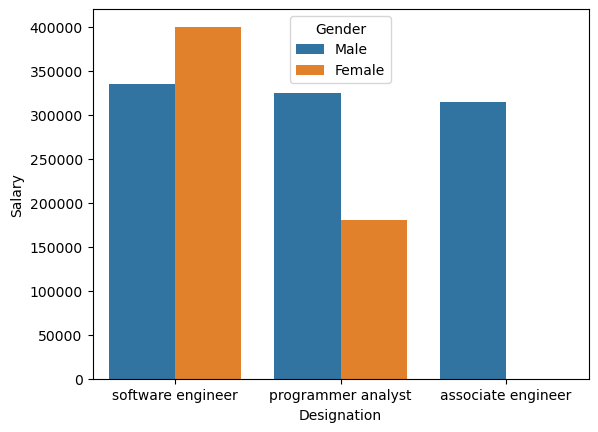

In [110]:
sns.barplot(data=filter_df, x="Designation", y="Salary", hue='Gender', ci=None)

##### `Conclusion` :-  For Freshers,the salary is starting from 300k and male are earing more than female as a fresher.

* * way - 2 :

<Figure size 1600x800 with 0 Axes>

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

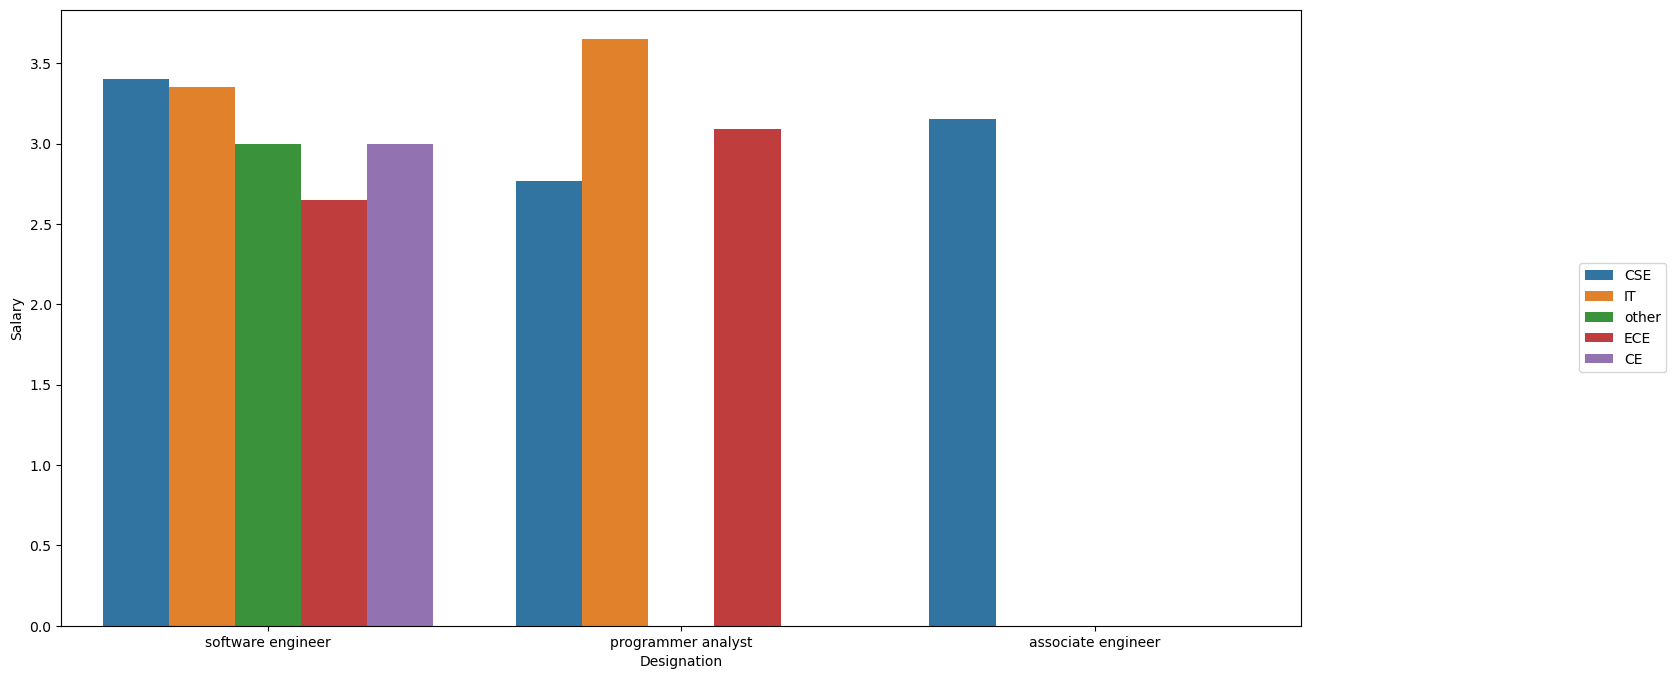

In [111]:
new1 = new[(new['Designation'].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (new['Tenure']==0)]
plt.figure(figsize=(16,8))
sns.barplot(x=new1['Designation'],y=new1['Salary']/100000,hue=new1['Specialization'], ci=None)
plt.legend(bbox_to_anchor=(1.3, 0.6))

##### `Observation` :- From the plot, it is evident that Programming Analysts, Software Engineers, Hardware Engineers and Associate Engineers can earn up to 2.5–3 lakhs as a fresh graduate.

* * way - 3 :

In [112]:
prog_anl_sal= df.loc[df['Designation'] == 'programmer analyst','Salary'].values
sw_eng_sal = df.loc[df['Designation'] == 'software engineer','Salary'].values
hw_eng_sal = df.loc[df['Designation'] == 'hardware engineer','Salary'].values
asc_eng_sal = df.loc[df['Designation'] == 'associate engineer','Salary'].values

In [113]:
print('Null Hypothesis: Fresh graduate can earn up to 2.5-3 lakhs')
print('Alternate Hypothesis : Fresh graduate can not earn up to 2.5-3 lakhs')

Null Hypothesis: Fresh graduate can earn up to 2.5-3 lakhs
Alternate Hypothesis : Fresh graduate can not earn up to 2.5-3 lakhs


In [114]:
expected_range = (250000, 300000)

for job, salaries in [("programmer analyst", prog_anl_sal),("software engineer", sw_eng_sal),("hardware engineer", hw_eng_sal),("associate engineer", asc_eng_sal)]:
    t_stat, p_val = ttest_1samp(salaries,expected_range[0],alternative='greater')
    print(f"For {job} :")
    print(f"   t_critical: {t_stat:.2f}")
    print(f"   p_value: {p_val:.5e}")
    
    # check for statistical significance
    # 0.05 --- significance level
    
    if p_val < 0.05:
        print("   Result: There is sufficent evidence to reject the Null Hypothesis\n")
    else:
        print("   Result: There is not enough evidence to reject the Null Hypothesis\n")

For programmer analyst :
   t_critical: 17.66
   p_value: 1.60079e-37
   Result: There is sufficent evidence to reject the Null Hypothesis

For software engineer :
   t_critical: 15.32
   p_value: 2.52527e-44
   Result: There is sufficent evidence to reject the Null Hypothesis

For hardware engineer :
   t_critical: 0.69
   p_value: 2.56802e-01
   Result: There is not enough evidence to reject the Null Hypothesis

For associate engineer :
   t_critical: 0.66
   p_value: 2.70062e-01
   Result: There is not enough evidence to reject the Null Hypothesis



##### `Conclusion` :  A one-sample t-test is conducted for each job designation to compare their average salary against an expected range. For Programmer Analysts and Software Engineers, the test results show sufficient evidence to reject the null hypothesis, suggesting that their salaries significantly differ from the expected range. However, for Hardware Engineers and Associate Engineers, there is not enough evidence to reject the null hypothesis, indicating that their salaries may not significantly deviate from the expected range.

### Claim 2 : -  Is there a relationship between gender and specialization? (i.e. Does the preference of Specialization depend on the Gender?)

In [115]:
# create a contingency table
gender_specialization = pd.crosstab(new['Gender'], new['Specialization'])

# perform a chi-square test
chi2,p,dof, expected= chi2_contingency(gender_specialization)

# check for statistical significance
# 0.05 --- significance level

print(f"Chi2: {chi2}",'\n')
print(f"P-value: {p}",'\n')
print(f"Degrees of Freedom: {dof}",'\n')
if p < 0.05:
    print('There is a statistically significant relationship between gender and specialization')

else:
    print('There is no statistically significant relationship between gender and specialization')

Chi2: 48.82754513839844 

P-value: 6.860483790732195e-08 

Degrees of Freedom: 8 

There is a statistically significant relationship between gender and specialization


* * Calculating chi2_critical :

In [116]:
confidence_level = 0.95
alpha = 1 - confidence_level
chi2_critical = scipy.stats.chi2.ppf(1 - alpha, dof)
chi2_critical

15.50731305586545

##### Observation : 
###### • As the result of the second research question, we can see that there is a relationship between Gender and specialization. 
###### • We test this claim through Chi-Square test and find the result that both the categorical variables are dependent on each other.

### * `Bonus` ( some interesting `conclusions` or `research questions` ) : -

### Claim : -  If the candidate has higher Education, it leads to better Salary. Test this claim with the data given to you.

In [117]:
new['Degree'].value_counts()

B.Tech/B.E.      3456
MCA               221
M.Tech./M.E.       34
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [118]:
# Converting Bachelors to UnderGrad and Masters to PostGrad
new['Graduation_level'] = ['UnderGraduation' if x == 'B.Tech/B.E.' else 'PostGraduation' for x in new['Degree']]

undergrad_sal = new.loc[new['Graduation_level']=='UnderGraduation','Salary']
postgrad_sal = new.loc[new['Graduation_level']=='PostGraduation','Salary']

In [119]:
t_statistic, p = stats.ttest_ind(undergrad_sal, postgrad_sal)
print("p-value:", p,'\n')
if p < 0.05:
    print("There is a statistically significant difference in the average salary between undergraduates and postgraduates.")
else:
    print("There is no statistically significant difference in the average salary between undergraduates and postgraduates.")

p-value: 0.8592606597566823 

There is no statistically significant difference in the average salary between undergraduates and postgraduates.


##### Observation :
###### • As the result of the Bonus research question, we can see that there is no difference in Salaries between under-graduates and post-graduates.
###### • We test this claim through t-test and find the result that, Salary is not depend on Degree(Under-Graduate & Post-Graduate).